# Reservoirs analysis

Script to run basic analysis of the role of reservoirs in AWASH

#### Initialization of the model

In [15]:
cd("../../src")
include("nui.jl")

LoadError: [91mchdir ../../src: no such file or directory (ENOENT)[39m

In [16]:
config = readconfig("../configs/standard-10year.yml");

#### Computation of the water deficits

In [20]:
# without reservoir
config["rescap"] = "zero";
include("optimize-surface.jl");
f_wores = reshape(sol.sol[1:varlens[1]], numregions, numsteps);

Loading from saved region network...
Loading from saved water network...
Loading saved groundwater model...


1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71


72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277
278
279
280
281
282
283
284
285
286
287
288
289
290
291
292
293
294
295
296
297
298
299
300
301
302
303
304
305
306
307
308
309
310
311
312
313
314
315
316
317
318
319
320
321
322
323
324
325
326
327
328


1929
1930
1931
1932
1933
1934
1935
1936
1937
1938
1939
1940
1941
1942
1943
1944
1945
1946
1947
1948
1949
1950
1951
1952
1953
1954
1955
1956
1957
1958
1959
1960
1961
1962
1963
1964
1965
1966
1967
1968
1969
1970
1971
1972
1973
1974
1975
1976
1977
1978
1979
1980
1981
1982
1983
1984
1985
1986
1987
1988
1989
1990
1991
1992
1993
1994
1995
1996
1997
1998
1999
2000
2001
2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016
2017
2018
2019
2020
2021
2022
2023
2024
2025
2026
2027
2028
2029
2030
2031
2032
2033
2034
2035
2036
2037
2038
2039
2040
2041
2042
2043
2044
2045
2046
2047
2048
2049
2050
2051
2052
2053
2054
2055
2056
2057
2058
2059
2060
2061
2062
2063
2064
2065
2066
2067
2068
2069
2070
2071
2072
2073
2074
2075
2076
2077
2078
2079
2080
2081
2082
2083
2084
2085
2086
2087
2088
2089
2090
2091
2092
2093
2094
2095
2096
2097
2098
2099
2100
2101
2102
2103
2104
2105
2106
2107
2108
2109
2110
2111
2112
2113
2114
2115
2116
2117
2118
2119
2120
2121
2122
2123
2124
2125
2126
2127
2128


3672
3673
3674
3675
3676
3677
3678
3679
3680
3681
3682
3683
3684
3685
3686
3687
3688
3689
3690
3691
3692
3693
3694
3695
3696
3697
3698
3699
3700
3701
3702
3703
3704
3705
3706
3707
3708
3709
3710
3711
3712
3713
3714
3715
3716
3717
3718
3719
3720
3721
3722
3723
3724
3725
3726
3727
3728
3729
3730
3731
3732
3733
3734
3735
3736
3737
3738
3739
3740
3741
3742
3743
3744
3745
3746
3747
3748
3749
3750
3751
3752
3753
3754
3755
3756
3757
3758
3759
3760
3761
3762
3763
3764
3765
3766
3767
3768
3769
3770
3771
3772
3773
3774
3775
3776
3777
3778
3779
3780
3781
3782
3783
3784
3785
3786
3787
3788
3789
3790
3791
3792
3793
3794
3795
3796
3797
3798
3799
3800
3801
3802
3803
3804
3805
3806
3807
3808
3809
3810
3811
3812
3813
3814
3815
3816
3817
3818
3819
3820
3821
3822
3823
3824
3825
3826
3827
3828
3829
3830
3831
3832
3833
3834
3835
3836
3837
3838
3839
3840
3841
3842
3843
3844
3845
3846
3847
3848
3849
3850
3851
3852
3853
3854
3855
3856
3857
3858
3859
3860
3861
3862
3863
3864
3865
3866
3867
3868
3869
3870
3871


5312
5313
5314
5315
5316
5317
5318
5319
5320
5321
5322
5323
5324
5325
5326
5327
5328
5329
5330
5331
5332
5333
5334
5335
5336
5337
5338
5339
5340
5341
5342
5343
5344
5345
5346
5347
5348
5349
5350
5351
5352
5353
5354
5355
5356
5357
5358
5359
5360
5361
5362
5363
5364
5365
5366
5367
5368
5369
5370
5371
5372
5373
5374
5375
5376
5377
5378
5379
5380
5381
5382
5383
5384
5385
5386
5387
5388
5389
5390
5391
5392
5393
5394
5395
5396
5397
5398
5399
5400
5401
5402
5403
5404
5405
5406
5407
5408
5409
5410
5411
5412
5413
5414
5415
5416
5417
5418
5419
5420
5421
5422
5423
5424
5425
5426
5427
5428
5429
5430
5431
5432
5433
5434
5435
5436
5437
5438
5439
5440
5441
5442
5443
5444
5445
5446
5447
5448
5449
5450
5451
5452
5453
5454
5455
5456
5457
5458
5459
5460
5461
5462
5463
5464
5465
5466
5467
5468
5469
5470
5471
5472
5473
5474
5475
5476
5477
5478
5479
5480
5481
5482
5483
5484
5485
5486
5487
5488
5489
5490
5491
5492
5493
5494
5495
5496
5497
5498
5499
5500
5501
5502
5503
5504
5505
5506
5507
5508
5509
5510
5511


7055
7056
7057
7058
7059
7060
7061
7062
7063
7064
7065
7066
7067
7068
7069
7070
7071
7072
7073
7074
7075
7076
7077
7078
7079
7080
7081
7082
7083
7084
7085
7086
7087
7088
7089
7090
7091
7092
7093
7094
7095
7096
7097
7098
7099
7100
7101
7102
7103
7104
7105
7106
7107
7108
7109
7110
7111
7112
7113
7114
7115
7116
7117
7118
7119
7120
7121
7122
7123
7124
7125
7126
7127
7128
7129
7130
7131
7132
7133
7134
7135
7136
7137
7138
7139
7140
7141
7142
7143
7144
7145
7146
7147
7148
7149
7150
7151
7152
7153
7154
7155
7156
7157
7158
7159
7160
7161
7162
7163
7164
7165
7166
7167
7168
7169
7170
7171
7172
7173
7174
7175
7176
7177
7178
7179
7180
7181
7182
7183
7184
7185
7186
7187
7188
7189
7190
7191
7192
7193
7194
7195
7196
7197
7198
7199
7200
7201
7202
7203
7204
7205
7206
7207
7208
7209
7210
7211
7212
7213
7214
7215
7216
7217
7218
7219
7220
7221
7222
7223
7224
7225
7226
7227
7228
7229
7230
7231
7232
7233
7234
7235
7236
7237
7238
7239
7240
7241
7242
7243
7244
7245
7246
7247
7248
7249
7250
7251
7252
7253
7254


8739
8740
8741
8742
8743
8744
8745
8746
8747
8748
8749
8750
8751
8752
8753
8754
8755
8756
8757
8758
8759
8760
8761
8762
8763
8764
8765
8766
8767
8768
8769
8770
8771
8772
8773
8774
8775
8776
8777
8778
8779
8780
8781
8782
8783
8784
8785
8786
8787
8788
8789
8790
8791
8792
8793
8794
8795
8796
8797
8798
8799
8800
8801
8802
8803
8804
8805
8806
8807
8808
8809
8810
8811
8812
8813
8814
8815
8816
8817
8818
8819
8820
8821
8822
8823
8824
8825
8826
8827
8828
8829
8830
8831
8832
8833
8834
8835
8836
8837
8838
8839
8840
8841
8842
8843
8844
8845
8846
8847
8848
8849
8850
8851
8852
8853
8854
8855
8856
8857
8858
8859
8860
8861
8862
8863
8864
8865
8866
8867
8868
8869
8870
8871
8872
8873
8874
8875
8876
8877
8878
8879
8880
8881
8882
8883
8884
8885
8886
8887
8888
8889
8890
8891
8892
8893
8894
8895
8896
8897
8898
8899
8900
8901
8902
8903
8904
8905
8906
8907
8908
8909
8910
8911
8912
8913
8914
8915
8916
8917
8918
8919
8920
8921
8922
8923
8924
8925
8926
8927
8928
8929
8930
8931
8932
8933
8934
8935
8936
8937
8938


10370
10371
10372
10373
10374
10375
10376
10377
10378
10379
10380
10381
10382
10383
10384
10385
10386
10387
10388
10389
10390
10391
10392
10393
10394
10395
10396
10397
10398
10399
10400
10401
10402
10403
10404
10405
10406
10407
10408
10409
10410
10411
10412
10413
10414
10415
10416
10417
10418
10419
10420
10421
10422
10423
10424
10425
10426
10427
10428
10429
10430
10431
10432
10433
10434
10435
10436
10437
10438
10439
10440
10441
10442
10443
10444
10445
10446
10447
10448
10449
10450
10451
10452
10453
10454
10455
10456
10457
10458
10459
10460
10461
10462
10463
10464
10465
10466
10467
10468
10469
10470
10471
10472
10473
10474
10475
10476
10477
10478
10479
10480
10481
10482
10483
10484
10485
10486
10487
10488
10489
10490
10491
10492
10493
10494
10495
10496
10497
10498
10499
10500
10501
10502
10503
10504
10505
10506
10507
10508
10509
10510
10511
10512
10513
10514
10515
10516
10517
10518
10519
10520
10521
10522
10523
10524
10525
10526
10527
10528
10529
10530
10531
10532
10533
10534
10535
1053

11739
11740
11741
11742
11743
11744
11745
11746
11747
11748
11749
11750
11751
11752
11753
11754
11755
11756
11757
11758
11759
11760
11761
11762
11763
11764
11765
11766
11767
11768
11769
11770
11771
11772
11773
11774
11775
11776
11777
11778
11779
11780
11781
11782
11783
11784
11785
11786
11787
11788
11789
11790
11791
11792
11793
11794
11795
11796
11797
11798
11799
11800
11801
11802
11803
11804
11805
11806
11807
11808
11809
11810
11811
11812
11813
11814
11815
11816
11817
11818
11819
11820
11821
11822
11823
11824
11825
11826
11827
11828
11829
11830
11831
11832
11833
11834
11835
11836
11837
11838
11839
11840
11841
11842
11843
11844
11845
11846
11847
11848
11849
11850
11851
11852
11853
11854
11855
11856
11857
11858
11859
11860
11861
11862
11863
11864
11865
11866
11867
11868
11869
11870
11871
11872
11873
11874
11875
11876
11877
11878
11879
11880
11881
11882
11883
11884
11885
11886
11887
11888
11889
11890
11891
11892
11893
11894
11895
11896
11897
11898
11899
11900
11901
11902
11903
11904
1190

13223
13224
13225
13226
13227
13228
13229
13230
13231
13232
13233
13234
13235
13236
13237
13238
13239
13240
13241
13242
13243
13244
13245
13246
13247
13248
13249
13250
13251
13252
13253
13254
13255
13256
13257
13258
13259
13260
13261
13262
13263
13264
13265
13266
13267
13268
13269
13270
13271
13272
13273
13274
13275
13276
13277
13278
13279
13280
13281
13282
13283
13284
13285
13286
13287
13288
13289
13290
13291
13292
13293
13294
13295
13296
13297
13298
13299
13300
13301
13302
13303
13304
13305
13306
13307
13308
13309
13310
13311
13312
13313
13314
13315
13316
13317
13318
13319
13320
13321
13322
13323
13324
13325
13326
13327
13328
13329
13330
13331
13332
13333
13334
13335
13336
13337
13338
13339
13340
13341
13342
13343
13344
13345
13346
13347
13348
13349
13350
13351
13352
13353
13354
13355
13356
13357
13358
13359
13360
13361
13362
13363
13364
13365
13366
13367
13368
13369
13370
13371
13372
13373
13374
13375
13376
13377
13378
13379
13380
13381
13382
13383
13384
13385
13386
13387
13388
1338

14665
14666
14667
14668
14669
14670
14671
14672
14673
14674
14675
14676
14677
14678
14679
14680
14681
14682
14683
14684
14685
14686
14687
14688
14689
14690
14691
14692
14693
14694
14695
14696
14697
14698
14699
14700
14701
14702
14703
14704
14705
14706
14707
14708
14709
14710
14711
14712
14713
14714
14715
14716
14717
14718
14719
14720
14721
14722
14723
14724
14725
14726
14727
14728
14729
14730
14731
14732
14733
14734
14735
14736
14737
14738
14739
14740
14741
14742
14743
14744
14745
14746
14747
14748
14749
14750
14751
14752
14753
14754
14755
14756
14757
14758
14759
14760
14761
14762
14763
14764
14765
14766
14767
14768
14769
14770
14771
14772
14773
14774
14775
14776
14777
14778
14779
14780
14781
14782
14783
14784
14785
14786
14787
14788
14789
14790
14791
14792
14793
14794
14795
14796
14797
14798
14799
14800
14801
14802
14803
14804
14805
14806
14807
14808
14809
14810
14811
14812
14813
14814
14815
14816
14817
14818
14819
14820
14821
14822
14823
14824
14825
14826
14827
14828
14829
14830
1483

16101
16102
16103
16104
16105
16106
16107
16108
16109
16110
16111
16112
16113
16114
16115
16116
16117
16118
16119
16120
16121
16122
16123
16124
16125
16126
16127
16128
16129
16130
16131
16132
16133
16134
16135
16136
16137
16138
16139
16140
16141
16142
16143
16144
16145
16146
16147
16148
16149
16150
16151
16152
16153
16154
16155
16156
16157
16158
16159
16160
16161
16162
16163
16164
16165
16166
16167
16168
16169
16170
16171
16172
16173
16174
16175
16176
16177
16178
16179
16180
16181
16182
16183
16184
16185
16186
16187
16188
16189
16190
16191
16192
16193
16194
16195
16196
16197
16198
16199
16200
16201
16202
16203
16204
16205
16206
16207
16208
16209
16210
16211
16212
16213
16214
16215
16216
16217
16218
16219
16220
16221
16222
16223
16224
16225
16226
16227
16228
16229
16230
16231
16232
16233
16234
16235
16236
16237
16238
16239
16240
16241
16242
16243
16244
16245
16246
16247
16248
16249
16250
16251
16252
16253
16254
16255
16256
16257
16258
16259
16260
16261
16262
16263
16264
16265
16266
1626

17509
17510
17511
17512
17513
17514
17515
17516
17517
17518
17519
17520
17521
17522
17523
17524
17525
17526
17527
17528
17529
17530
17531
17532
17533
17534
17535
17536
17537
17538
17539
17540
17541
17542
17543
17544
17545
17546
17547
17548
17549
17550
17551
17552
17553
17554
17555
17556
17557
17558
17559
17560
17561
17562
17563
17564
17565
17566
17567
17568
17569
17570
17571
17572
17573
17574
17575
17576
17577
17578
17579
17580
17581
17582
17583
17584
17585
17586
17587
17588
17589
17590
17591
17592
17593
17594
17595
17596
17597
17598
17599
17600
17601
17602
17603
17604
17605
17606
17607
17608
17609
17610
17611
17612
17613
17614
17615
17616
17617
17618
17619
17620
17621
17622
17623
17624
17625
17626
17627
17628
17629
17630
17631
17632
17633
17634
17635
17636
17637
17638
17639
17640
17641
17642
17643
17644
17645
17646
17647
17648
17649
17650
17651
17652
17653
17654
17655
17656
17657
17658
17659
17660
17661
17662
17663
17664
17665
17666
17667
17668
17669
17670
17671
17672
17673
17674
1767

18931
18932
18933
18934
18935
18936
18937
18938
18939
18940
18941
18942
18943
18944
18945
18946
18947
18948
18949
18950
18951
18952
18953
18954
18955
18956
18957
18958
18959
18960
18961
18962
18963
18964
18965
18966
18967
18968
18969
18970
18971
18972
18973
18974
18975
18976
18977
18978
18979
18980
18981
18982
18983
18984
18985
18986
18987
18988
18989
18990
18991
18992
18993
18994
18995
18996
18997
18998
18999
19000
19001
19002
19003
19004
19005
19006
19007
19008
19009
19010
19011
19012
19013
19014
19015
19016
19017
19018
19019
19020
19021
19022
19023
19024
19025
19026
19027
19028
19029
19030
19031
19032
19033
19034
19035
19036
19037
19038
19039
19040
19041
19042
19043
19044
19045
19046
19047
19048
19049
19050
19051
19052
19053
19054
19055
19056
19057
19058
19059
19060
19061
19062
19063
19064
19065
19066
19067
19068
19069
19070
19071
19072
19073
19074
19075
19076
19077
19078
19079
19080
19081
19082
19083
19084
19085
19086
19087
19088
19089
19090
19091
19092
19093
19094
19095
19096
1909

20368
20369
20370
20371
20372
20373
20374
20375
20376
20377
20378
20379
20380
20381
20382
20383
20384
20385
20386
20387
20388
20389
20390
20391
20392
20393
20394
20395
20396
20397
20398
20399
20400
20401
20402
20403
20404
20405
20406
20407
20408
20409
20410
20411
20412
20413
20414
20415
20416
20417
20418
20419
20420
20421
20422
20423
20424
20425
20426
20427
20428
20429
20430
20431
20432
20433
20434
20435
20436
20437
20438
20439
20440
20441
20442
20443
20444
20445
20446
20447
20448
20449
20450
20451
20452
20453
20454
20455
20456
20457
20458
20459
20460
20461
20462
20463
20464
20465
20466
20467
20468
20469
20470
20471
20472
20473
20474
20475
20476
20477
20478
20479
20480
20481
20482
20483
20484
20485
20486
20487
20488
20489
20490
20491
20492
20493
20494
20495
20496
20497
20498
20499
20500
20501
20502
20503
20504
20505
20506
20507
20508
20509
20510
20511
20512
20513
20514
20515
20516
20517
20518
20519
20520
20521
20522
20523
20524
20525
20526
20527
20528
20529
20530
20531
20532
20533
2053

21809
21810
21811
21812
21813
21814
21815
21816
21817
21818
21819
21820
21821
21822
21823
21824
21825
21826
21827
21828
21829
21830
21831
21832
21833
21834
21835
21836
21837
21838
21839
21840
21841
21842
21843
21844
21845
21846
21847
21848
21849
21850
21851
21852
21853
21854
21855
21856
21857
21858
21859
21860
21861
21862
21863
21864
21865
21866
21867
21868
21869
21870
21871
21872
21873
21874
21875
21876
21877
21878
21879
21880
21881
21882
21883
21884
21885
21886
21887
21888
21889
21890
21891
21892
21893
21894
21895
21896
21897
21898
21899
21900
21901
21902
21903
21904
21905
21906
21907
21908
21909
21910
21911
21912
21913
21914
21915
21916
21917
21918
21919
21920
21921
21922
21923
21924
21925
21926
21927
21928
21929
21930
21931
21932
21933
21934
21935
21936
21937
21938
21939
21940
21941
21942
21943
21944
21945
21946
21947
21948
21949
21950
21951
21952
21953
21954
21955
21956
21957
21958
21959
21960
21961
21962
21963
21964
21965
21966
21967
21968
21969
21970
21971
21972
21973
21974
2197

23275
23276
23277
23278
23279
23280
23281
23282
23283
23284
23285
23286
23287
23288
23289
23290
23291
23292
23293
23294
23295
23296
23297
23298
23299
23300
23301
23302
23303
23304
23305
23306
23307
23308
23309
23310
23311
23312
23313
23314
23315
23316
23317
23318
23319
23320
23321
23322
23323
23324
23325
23326
23327
23328
23329
23330
23331
23332
23333
23334
23335
23336
23337
23338
23339
23340
23341
23342
23343
23344
23345
23346
23347
23348
23349
23350
23351
23352
23353
23354
23355
23356
23357
23358
23359
23360
23361
23362
23363
23364
23365
23366
23367
23368
23369
23370
23371
23372
23373
23374
23375
23376
23377
23378
23379
23380
23381
23382
23383
23384
23385
23386
23387
23388
23389
23390
23391
23392
23393
23394
23395
23396
23397
23398
23399
23400
23401
23402
23403
23404
23405
23406
23407
23408
23409
23410
23411
23412
23413
23414
23415
23416
23417
23418
23419
23420
23421
23422
23423
23424
23425
23426
23427
23428
23429
23430
23431
23432
23433
23434
23435
23436
23437
23438
23439
23440
2344

13929
20705
20553
15474
18347
18348
18351
18352
20706
13901
13902
13903
13892
13893
13894
13895
13896
15624
15625
20658
13898
13897
15637
13899
13900
18323
18324
13905
13906
15612
15613
13904
13907
20314
20335
20313
18317
20384
13864
13865
15820
15814
15815
13866
13860
13861
13862
20359
13856
13858
13859
13857
18311
13848
13849
20390
13850
13852
13853
20529
15764
15765
13837
13839
13838
13840
13841
13842
13834
13832
20533
13790
13791
13792
13782
13783
13784
13780
13781
20874
13766
13767
13768
13769
13771
13772
20796
13770
13773
20725
13775
13776
13779
13777
13778
13774
13785
20644
13786
13787
20579
13789
13788
13793
15697
13794
18297
18298
13795
13796
18299
18300
13816
13817
15484
15452
13798
13799
13800
13804
15555
13805
13806
13807
13808
13809
13802
13803
13801
13810
20756
13812
13813
13814
13815
13811
13818
13797
13819
13820
13821
13826
18301
18302
13827
20655
13822
13823
13824
20544
13829
15756
15757
13830
13831
13825
18307
18308
18305
18306
13828
20641
13833
13835
18303
18304
1384

11162
11163
16212
16213
16247
16248
11169
11170
11165
11166
11168
11167
20068
11171
11164
11172
16289
16290
18110
18111
18112
16209
16210
11120
18109
11122
11123
11124
11121
11125
18427
11126
18108
11117
11118
16193
11100
11101
11089
11086
11088
11087
11080
16368
16396
11073
11074
11075
11076
11077
16319
11081
16195
16202
11083
11084
11085
11082
18107
11090
11091
11096
11093
11094
11095
11097
20108
11092
11098
20076
11099
11102
20121
20262
11112
11104
20209
11108
11106
11107
11105
11111
11109
11110
11113
20216
20195
20117
11114
11103
11115
11070
11071
11072
16120
18104
18105
18106
16121
11060
11062
11061
11063
11064
11065
11066
20247
20276
20245
20336
20246
11030
11031
11032
11033
20423
11034
11035
11036
20407
15925
15926
15923
11037
20393
11038
11039
11022
11023
20662
11001
20541
11003
11004
11002
15822
11014
11009
11011
11010
15767
11005
11007
11008
15790
11006
11012
11015
11017
11016
11013
11018
11020
15857
11021
11019
11024
11026
11027
11025
11028
20379
11029
11040
20282
11041
1105

10739
19103
19068
19050
10743
19044
10745
10746
10747
10744
10749
19001
10753
18075
10756
18991
18980
18968
10759
10761
17573
18897
17574
18078
18079
18886
18080
18826
18081
18082
18883
18933
18995
18919
18879
18859
18087
18782
18088
17639
17640
18085
18086
18083
18084
18870
18781
18816
18797
18842
18812
18795
10767
18819
18750
18707
18687
18734
18784
18803
18765
18783
18746
18718
18697
17730
18683
17731
18692
18677
18666
18640
18615
18595
18582
18561
18554
33
18543
17787
17788
34
35
36
20501
7789
7790
20647
7781
7782
7783
20491
7779
20575
7773
20484
20497
15964
7771
20524
7764
7765
7766
7767
7768
20404
15972
20518
20403
7769
20576
7770
20542
20517
7772
20483
7774
7775
7776
20507
7778
7777
7780
7784
7785
7786
20488
7788
7787
20622
7761
7762
20649
7759
20623
20637
7757
20713
20711
20626
7745
7747
7748
7746
7749
7751
7752
7750
7753
7743
7744
20749
7741
20720
20523
7729
15918
15919
7730
20599
7732
7733
7731
7734
20673
7735
20707
20652
7736
20682
7738
7737
7739
7740
20719
7742
7754
20709
2

18864
10198
10200
10201
10199
17676
17677
10202
10197
10203
10205
10206
10207
10209
10208
10210
18785
10212
10213
10214
17690
17691
10215
10216
10211
10204
10217
10218
10219
18820
10220
10184
10185
18856
17643
17644
17634
17635
10172
10173
10174
10175
10176
10178
10179
10180
10181
10177
17839
17627
10182
10183
17602
10168
10169
10170
10166
17558
10167
18964
10163
17556
10165
17546
17547
19000
17522
10161
10159
10160
17533
17534
10131
10132
18984
10133
10134
10138
17540
17557
10139
10136
10137
10135
17517
17518
10140
19042
10142
19066
17448
10143
10141
10144
10146
10147
10148
10149
10150
17538
17539
10152
10151
17478
17513
17514
10153
10154
10145
10155
10156
19083
10111
10112
19075
17836
19164
19205
19144
17837
10113
19125
10117
19174
19241
10115
19189
10116
19161
17413
19099
17414
10118
10119
10121
10120
10122
10123
10124
10114
10125
10126
17410
17411
10127
10129
10130
17422
10128
19082
19037
10157
10158
17443
17444
17474
10162
17483
17484
10164
18940
17838
17611
17612
10171
17840
1888

19824
8535
8533
8534
19834
8522
8523
8524
8525
19852
19832
8526
16683
8527
8528
8529
19915
8530
19833
16656
16657
8457
8458
8459
8461
8462
8463
8460
8465
8466
8467
8464
8469
8444
8445
16662
8446
8441
8443
16648
16649
8433
8434
8435
8436
8437
8438
8439
19894
8431
17824
17825
19952
19984
8425
8409
8410
20109
8407
20085
8408
8405
8406
20211
8398
20187
8400
8399
8401
20144
20157
20143
8403
8404
8402
20084
8411
8412
8413
20007
8422
8420
8421
20083
8415
8416
20071
8417
8418
20051
8419
8423
8424
8414
8426
19948
16609
8427
19976
8336
8332
8333
16504
8334
19979
8320
8321
8322
8324
8325
20129
8299
8300
8302
8303
8301
8304
20053
8291
20093
8289
19951
20020
20048
20019
8267
8268
20067
8269
8270
19935
19936
19934
8272
19966
8274
8273
16525
8275
8276
8277
8271
8278
8279
8280
16317
16318
20116
20096
8282
8283
8284
8285
20114
20133
20113
20158
20105
8287
8286
8288
8281
8290
8292
8293
20156
8295
8296
8297
8298
8294
8305
8307
8306
8308
19942
8310
19975
8311
8312
8313
8314
19944
19974
19943
8316
8317
831

6856
6857
6859
6860
6858
6861
6868
6869
6863
6864
6865
6867
6866
6870
6871
20119
6873
6872
6874
6862
6875
6876
6877
6885
6886
6878
6880
6882
6881
6883
6879
6884
6887
6902
6903
6900
6901
6893
6894
6895
6897
6898
6899
6896
6891
6892
6889
6890
6888
16090
16091
6923
6924
6922
6928
6930
6929
6931
6932
6934
6936
6935
6937
6933
6938
6926
6927
6925
16134
16124
6939
6940
6942
16144
6943
15920
15952
15921
15869
6945
15911
6947
6946
20505
6948
6952
6953
6950
6951
6949
6954
6960
6961
6962
6958
6959
6956
6957
6955
16068
16069
6966
6967
6964
6965
6963
6944
16152
6971
6972
6973
20230
6974
20147
6987
6988
6982
6984
6985
6983
6986
6980
6981
6978
6979
6976
6977
6975
16329
6995
6996
16343
16344
6994
6997
16238
16239
6999
7000
20193
7001
20137
7002
7003
7004
7005
7006
16369
16370
6998
7040
7046
16475
20031
16476
20000
19938
7054
19853
7055
7056
16646
7057
7059
7058
16647
8655
8656
72
73
74
3735
3736
19045
3725
3726
19035
3727
3728
18993
3730
3729
3731
3733
3734
3732
17531
3737
3738
3739
3741
3742
18936
37

19893
4750
4748
4749
4746
4747
4744
4745
4751
4752
4743
4878
4890
87
4891
16698
16699
88
4903
16802
19705
4907
4910
4912
4911
4908
4909
84
85
5272
17293
5270
5271
5273
17249
5274
5276
17261
5275
19227
5277
5263
5265
5264
5266
5257
5258
5248
5250
5249
5251
5252
5253
5255
5256
5254
5259
5246
5247
5238
5239
5240
5234
5235
5232
19365
5229
5230
5227
5228
19305
5225
5223
5221
5222
5186
5187
5188
5189
5190
5191
5192
5196
5197
5198
5194
5195
5193
17102
17101
5199
5200
5201
5209
5203
5204
5205
5206
5207
5208
5211
5212
5210
5213
5214
5202
5216
5217
5218
5219
5215
17066
5144
5119
5121
5122
5123
5124
5120
5125
17073
17071
17070
17079
5132
5133
5134
5135
5136
5137
5138
5140
5141
5139
5127
5128
5129
5130
5131
5142
5143
5126
17062
5145
17058
17043
5146
5148
5149
5147
5150
5112
5113
5114
5115
5116
5117
5118
5011
5013
5014
5015
5012
5016
5022
5018
5019
5020
5021
5017
5024
5025
5028
5026
5027
5029
5030
5023
5032
5033
5031
5035
5036
5034
5038
5039
5040
5041
5043
5042
5044
5046
5047
5045
5048
5049
5050
50

579
580
584
585
582
583
581
15593
575
576
568
569
571
572
570
574
573
577
558
559
560
562
563
561
564
15571
556
557
566
567
547
544
545
546
15459
542
543
539
15436
15437
541
533
15374
534
535
536
20784
529
530
531
527
528
525
526
15287
15288
523
524
517
518
519
521
522
509
510
511
512
513
514
507
508
515
14977
499
500
501
502
15002
503
505
506
504
15198
15199
516
520
15391
532
540
15499
548
15514
552
553
15522
554
555
550
551
549
565
578
15597
587
588
586
594
15675
595
592
593
590
591
589
613
620
621
119
637
635
636
638
15759
15760
632
633
634
15751
631
15703
627
628
15730
629
630
15748
639
641
642
640
624
625
626
643
644
622
623
120
121
346
340
341
342
343
344
345
348
15629
349
347
350
15477
15476
314
316
315
317
312
313
309
310
311
15350
15383
15351
15344
15345
15381
15382
291
15339
285
286
283
284
280
281
15312
282
277
278
279
15380
15410
15411
289
290
287
288
15375
292
293
15549
295
297
298
299
300
296
301
302
15460
15461
304
305
306
307
308
303
294
20627
318
326
327
329
331
15630


16196
1556
16174
1558
1557
1559
1560
1561
20055
1562
16167
20035
1563
1564
1565
16172
1566
1567
1568
1569
1570
1571
1572
1573
1575
1574
1576
1577
1579
1578
1580
1581
1583
1584
1582
1585
1587
1588
1586
1590
1592
1591
1593
1594
1589
1595
1596
1597
1598
1599
1600
1601
1603
1602
1604
1605
1606
1608
1607
1609
1611
1610
1612
1613
1615
1616
1614
16316
1617
1618
1619
1621
1622
1620
1623
1625
1624
1627
1628
1629
1630
1626
1631
1632
1633
1634
1635
1636
1637
1638
1639
1640
1642
1641
1643
1645
1644
1646
1648
1649
1650
1647
1651
1653
1654
1655
1652
1656
1658
1659
1657
16428
1661
1662
1663
1660
1664
1666
1668
1667
1669
1670
1665
1672
1673
1674
1671
1676
1677
1675
1678
1682
1683
1680
1681
16298
16275
1679
1684
1685
19867
1686
1687
1688
1690
1691
1692
1689
1693
1694
1695
1696
1697
1698
1699
1700
19906
1701
1702
1703
1710
16379
1711
1712
1708
1709
1705
1706
1707
1704
16188
1713
1714
1715
1716
1717
1720
1718
1719
1721
1722
1724
1725
19973
1723
1726
1727
16322
1728
1730
1731
1732
1729
1733
1735
1734
1736

3917
3918
3919
3921
3922
3920
3923
3924
16299
16300
3925
3926
3928
3929
16186
16187
3927
3930
4008
4009
4010
4012
4013
4011
4014
20130
4016
4015
4017
16103
4018
4019
16182
4020
4021
4022
4023
16173
20107
16171
4024
4026
4027
16164
4028
4025
4029
4030
16245
4031
16231
4032
4033
16211
4035
4036
4034
4037
4058
4059
4051
4052
16224
16225
4053
4054
4049
4050
4039
4041
16161
4040
4042
20148
4048
16170
4044
4045
4046
4047
4043
20081
4055
20141
4057
4056
4038
4060
4062
4063
16331
4064
4065
4066
4067
16285
16286
16281
4061
4117
4118
4119
4120
4121
4122
19530
19510
4123
4125
4126
4124
4127
4128
4129
19625
4131
4132
17821
4130
4133
4134
19661
4136
4135
4137
4138
4139
4141
4143
4142
4144
4145
4140
4490
4491
4493
4492
4615
4616
4621
4622
4731
4732
4824
4825
5318
5319
5320
5321
5322
5324
5323
5325
5326
5327
5328
5329
5330
5331
5332
5333
5334
5335
14955
5336
14965
14966
14946
14947
14963
5337
21732
14960
5339
5340
5338
5341
5342
15028
15029
21722
15051
15018
15019
15081
15060
15061
14997
14998
21654


6128
20928
6087
20733
15407
6100
6101
6102
6103
6091
6092
6093
6095
6097
6098
6099
6096
6094
6089
6090
6105
6106
6104
6107
6109
6108
6088
6110
6112
6111
6129
15176
6082
6083
6086
6080
6081
6079
6133
6135
6136
6134
21097
21124
21093
20980
6076
6077
6075
6137
6138
6139
6140
6141
6143
6142
6144
6145
6146
15031
15032
15059
15073
15043
6147
6148
15154
15155
15152
15153
15144
15145
15168
15116
15117
15169
15177
15228
15260
15229
15190
15191
15210
15206
6149
15139
15140
15150
15151
15171
6151
6150
15273
6152
21308
21337
21307
6154
21288
15392
6155
15367
6156
21389
6157
6158
6153
6159
21388
6161
6162
6163
21448
6165
6164
6166
6160
6167
21873
6169
21992
6170
6171
6172
6173
6174
21725
21724
6180
6179
15048
6181
6185
6186
6183
6184
6182
6187
6189
6190
6191
6192
6193
6194
6188
6195
6196
6168
22125
6175
22091
6176
22078
6177
22039
6178
15076
15077
6197
21562
6199
6198
6200
6201
15022
15023
15025
14986
14987
6202
6204
6205
6203
6206
21744
21638
6207
6208
6209
6210
6211
21824
21865
21823
6212
6213
21

10052
10053
10054
10049
10057
10059
10060
10062
10061
10063
10064
10058
10047
18766
10065
10066
10068
10070
10069
10067
10071
10072
10073
17835
10075
10077
10076
10074
10078
10079
10080
10081
10091
10092
10093
10087
10088
10089
10097
10098
10090
10094
10095
10096
10099
10103
10100
10102
10101
17721
17722
10083
10085
10084
10086
10082
10104
10106
10105
10107
10108
10109
10110
10244
10245
10359
10360
10361
10362
10363
10371
10372
10369
10370
18700
10365
10366
18676
10368
10367
17759
10364
10373
10374
10375
10376
10377
10378
10379
10380
10381
10383
10384
10382
10385
10386
10387
10388
10389
10390
10391
10393
10394
10395
10392
17728
10396
10397
10398
10399
18732
10400
10401
10402
10403
10405
10406
10407
10404
17732
10408
18703
10410
10409
18681
10411
10412
10413
10414
18653
10416
10417
10419
10420
10418
10421
10415
10422
10423
10424
10426
10427
10425
18713
10428
10431
10429
10430
10432
10433
17729
10434
10435
10436
10438
10439
10440
10437
10441
10442
10443
17744
17741
17742
10444
10445
1044

12426
12427
12428
12429
12430
12431
12432
12433
12434
12435
12436
12437
12439
12440
12438
12441
19381
12443
12442
12444
12445
16752
12446
12447
12448
12449
12450
12451
12452
12453
12456
12457
12458
12459
16744
16745
19430
12454
12455
12460
12462
12463
12461
12464
12465
12466
12468
16544
12467
12469
12470
12471
12472
12473
12474
12481
12482
12483
12484
12485
12486
12487
12488
12489
12478
12476
12477
12479
12480
12475
12490
12492
12493
12491
12494
12495
12496
12498
12501
16505
12497
12499
12500
12502
12503
12504
12505
12506
12507
12508
12509
12510
16415
16416
12511
12512
12513
12514
12515
12516
12517
12518
12519
16508
16488
16502
12520
12523
12521
12522
12524
12525
16509
12526
12527
12528
12529
12530
12531
12532
12534
12535
12536
12533
12537
16436
12539
12538
12540
12544
12545
12546
12541
12542
12543
12547
18246
18247
12548
12549
12550
12552
12553
12551
12555
12557
12558
12559
12556
12560
12554
12561
12562
12563
16342
16337
12564
12565
12566
12567
12568
12570
12569
12571
12572
19460
1257

13627
13628
14638
13629
13630
13631
13632
13633
13634
14670
13635
22209
14668
14665
14666
14661
14662
14639
14631
22268
14632
22058
22057
22051
22214
22072
22300
22089
22292
22132
22165
22381
22362
22246
22452
22436
22297
22220
22205
22230
22355
22342
22451
22267
22223
22326
22334
22309
22222
22150
13636
13637
13638
21929
13639
13641
13643
13644
13642
13645
13646
13648
13649
13650
13647
13651
13640
13652
13656
13657
13658
21699
13660
13659
13661
13654
13655
13653
13662
13663
18260
18261
14712
18262
14714
13664
14688
14689
14694
13665
13666
14700
14701
13667
13670
13671
13672
13668
13669
21994
13673
13674
13675
14682
13676
13678
13679
13680
13681
14649
14650
22035
13677
22113
13682
13683
13684
13685
13686
13687
13688
22155
13689
13691
13692
13690
13693
22067
13695
14635
14636
13694
13696
13697
14675
14676
18263
14663
14646
18266
14647
14664
14654
21945
14655
14640
14641
14633
14637
14634
22065
14628
14629
22386
22375
14624
18267
18268
22261
22249
22361
22395
22360
22247
22385
22248
2226

21834
21817
21923
21967
21978
21934
21922
21941
21879
21825
21831
21774
21651
21619
21544
21521
21392
21557
21431
21319
21323
21522
21324
21457
21580
21695
21514
21399
21327
21240
21166
21177
21060
21161
21210
21242
21344
21241
21209
21160
21063
21066
21357
21452
21537
21592
21536
21450
21631
21930
21940
21816
21601
21741
21740
21738
21785
21739
21709
21600
21451
21356
21068
21131
21084
21089
21167
21087
21376
21545
21703
21786
21702
21797
21679
21470
21370
21219
21088
21380
21174
21326
21424
21587
21461
21386
21314
21261
21358
21257
21104
21082
21291
21331
21445
21446
21350
21330
21290
21106
21075
21173
21268
21284
21267
21172
21076
21154
21266
21282
21264
21353
21872
21932
21864
21708
21854
21742
21567
21729
21766
21726
21585
21473
21402
21351
21454
21352
21265
21345
21458
21333
21280
21387
21285
21299
21175
21176
21401
21459
21400
21208
21216
21246
21378
21244
21432
21245
21317
21377
21315
21549
21384
21316
21332
21527
21623
21525
21661
21526
21715
21765
21764
21846
21789
21840
2178

16918
16919
19533
19476
19563
19482
19573
19558
11320
19607
11321
16803
11303
11304
11305
19434
19439
19458
19437
19473
19438
19432
16888
16889
11275
11276
11278
11279
11277
11280
11281
11283
11284
16792
16793
11282
11285
11289
11290
11287
16814
11288
11286
11291
11292
19542
11267
11268
11271
11272
11269
16905
16906
11246
11247
11248
11249
11254
11255
11257
11256
11258
11259
11251
11252
11253
11250
11260
16804
16805
11262
11263
11264
11261
19569
11270
16881
11273
19495
19493
19548
19494
11274
19541
11293
11294
11296
11297
11298
11299
11300
11295
19433
11301
19561
11302
11306
11307
11309
16790
16796
11310
11311
11312
11308
19686
11313
11315
11314
19682
19624
11316
11317
11318
11319
19659
19671
19658
19606
19634
19619
19638
19633
19701
19726
11238
11236
11237
11227
11228
16566
16583
11229
11230
19815
11232
11233
19814
11231
11234
10999
11000
10989
10971
10973
10972
16735
16736
10969
10970
10974
10975
19687
10976
10977
10978
19757
10980
10982
16694
10983
10981
16704
18103
16705
10984
1098

18572
18565
18586
18573
18566
18571
18549
18556
18625
18646
18624
18596
18636
18620
18675
18623
18699
18663
18823
18845
18068
18069
19142
19156
18064
18065
19217
19238
19216
10695
19366
10652
10653
19398
10654
10655
10657
10659
10658
10660
10661
10662
10656
10663
10664
10673
10668
10669
18062
18063
10670
10671
10672
10674
10676
10677
10665
10667
10666
10675
10678
10679
19236
10680
10681
19446
10683
19397
19431
19396
10684
17076
10686
10687
19360
10688
19282
10690
10691
10689
10692
10685
10693
10694
10682
10696
19145
19098
17397
19088
17398
17423
10697
10698
18925
17424
18066
18070
18071
18877
18067
18844
18806
18672
18690
18751
18701
18673
18643
18720
18644
18654
18603
18598
18682
18618
18650
18651
18705
18736
18704
18671
18733
18691
10699
10700
18702
18678
18759
18773
18742
18679
18706
18793
10766
18814
18798
18796
18817
10762
10763
10764
18825
17659
17660
18851
18853
18850
18824
10765
18076
18077
18912
10760
18943
10757
10758
18975
18967
10754
10755
18989
10752
10750
10751
17470
1747

10144
10146
10147
10148
10149
10150
17538
17539
10152
10151
17478
17513
17514
10153
10154
10145
10155
10156
19083
10111
10112
19075
17836
19164
19205
19144
17837
10113
19125
10117
19174
19241
10115
19189
10116
19161
17413
19099
17414
10118
10119
10121
10120
10122
10123
10124
10114
10125
10126
17410
17411
10127
10129
10130
17422
10128
19082
19037
10157
10158
17443
17444
17474
10162
17483
17484
10164
18940
17838
17611
17612
10171
17840
18887
18848
18809
10226
17694
17695
10237
10238
10235
10236
17674
17675
17664
17665
10233
10234
17656
17657
10231
10232
17625
10229
10230
18764
10240
49
10241
10243
17733
10242
50
19289
17222
17223
19287
17179
17180
9316
9318
9319
9317
17232
17233
9314
9315
17218
17219
19388
19449
19497
19412
9305
19329
9289
9290
9291
9292
9293
19428
17014
9295
9296
9294
9297
19450
9283
9284
9274
9276
9277
9275
16932
9278
9279
9281
9282
9280
9285
9272
16934
16935
9270
9271
19577
9273
9286
9287
19487
9288
19441
9298
9299
19357
9301
9302
19356
9300
9303
18040
18041
19382
930

8316
8317
8318
8315
8319
8309
8323
16468
18028
18029
8330
8331
8328
8329
8326
8327
8335
8337
16639
8394
8395
19962
8374
8376
8375
16534
8377
19985
8378
8379
19928
8381
8382
8383
8384
8385
8380
16578
16579
8386
19920
8388
8387
8389
19844
19847
19843
8340
19913
8338
19873
8339
8341
8342
19882
8343
8344
8345
8346
8347
8348
8349
8353
8354
8351
8352
19885
8350
8355
8356
8357
16695
16696
8358
8360
8361
19919
8362
8363
8364
8365
19895
8366
8367
19858
8369
8368
8359
8370
8372
8373
8371
8390
8391
19901
8393
8392
19868
16640
8396
8397
8428
8429
8430
19896
8432
8440
16635
16636
8442
8447
8450
8451
8448
8449
19874
8452
8453
8454
8455
8456
16627
16628
8254
8256
8255
8251
8252
8253
8249
8250
19996
8257
8261
8262
8263
8264
8259
8260
8258
8265
20201
20179
8243
16243
16244
8244
8245
20027
20087
8235
8233
8234
20038
8236
8237
8239
8240
8238
8229
8230
8231
20118
8227
20318
8217
20197
8218
8219
8221
8222
8223
8224
8220
8225
8215
8216
8213
8214
16291
16292
8226
8228
8232
20045
20026
8241
8242
8247
8248
824

3980
3981
20199
3982
3979
3977
3983
3939
3811
3813
3812
16059
3814
3783
3784
3785
3786
3788
3789
3790
3791
3787
3792
3794
3795
20301
3781
20346
3758
3759
3761
3762
3760
15844
15845
3763
3765
3766
3764
15924
3767
3768
20425
3770
15894
3772
3773
3771
3774
3769
20353
3776
3775
3777
3778
3782
3793
3797
3798
3799
3801
3800
3802
3803
3804
3805
3806
3807
16009
16010
3796
3808
16017
16018
3810
3809
16060
3815
16064
16065
3816
16088
3818
3819
16097
3820
3817
16098
16183
16218
16184
3821
3822
16155
3823
3824
3825
3826
3828
3830
16111
16112
3831
3829
3827
16139
3832
3834
3835
3836
3833
16135
16136
3837
3838
16099
3839
3840
16110
3841
3842
3845
3846
3843
3844
3847
3848
3852
3853
3854
3855
3856
3857
3858
3859
3860
3861
3862
19854
3863
3864
3865
3871
16490
3872
3873
3876
3877
3874
3875
3878
3867
3868
3869
3870
3866
3879
3880
16375
16366
16367
3881
3882
16360
3883
3884
16335
19890
3885
3887
3888
3889
3886
3890
3892
3891
3893
3894
3895
3897
3898
3896
16336
20001
16321
3901
3903
3904
3902
16260
3905
39

2610
19163
2607
2601
2602
2603
2583
2584
17086
17087
17109
17110
17143
2581
2582
2577
2578
17156
2579
2580
2575
2576
17167
2585
2586
17157
17158
17144
17211
2587
2591
2592
2589
2590
17220
2588
2593
2595
2596
19220
19210
2597
2598
2594
2599
2600
19169
2604
17306
2605
2606
2608
2615
2628
2629
2622
2632
2633
2634
2630
2631
2623
2638
2639
2640
2636
2637
2641
2642
2643
2644
2635
2645
103
2646
2647
104
17291
17292
2448
2449
17142
17145
2439
2441
2408
2409
2372
2369
2370
2371
16985
2373
16983
16984
2374
2375
2376
2377
16967
16950
2378
2379
16951
2382
2383
2380
2381
16962
2388
2389
2386
2384
2387
2385
17000
2397
2398
2395
2396
2406
2407
2390
2392
2394
2393
2391
2404
2405
2402
2403
2399
2401
2400
17015
17068
2410
2411
2412
2416
2418
2419
2417
2421
2422
2424
2426
2427
2428
2425
2429
2430
2420
2431
2433
2434
2432
2436
2435
2423
2437
2438
2414
2415
2413
2440
2442
2446
2447
17130
17090
17091
2444
2445
2443
17148
17149
2450
2451
17191
17192
2500
2502
2501
2503
2504
2505
2474
2475
2470
2455
2456
2457

1331
1333
1334
1335
1337
1336
1338
1339
1340
1341
1342
1344
1343
1345
1346
1347
1348
1349
1350
1351
1352
1353
15652
1354
1355
1356
1357
15742
1358
1359
15699
1360
1362
1363
20516
1364
1361
1365
1369
1370
1367
1368
15646
15647
1371
1373
1374
1375
1377
1378
1379
15758
1376
1372
1380
1366
1383
1384
20409
1381
1382
1386
1388
1389
1387
15877
15878
15876
1390
1392
1393
1391
1395
1396
15862
1397
1394
1398
1400
15806
1402
1401
1403
1404
1405
1406
1407
1399
1408
15787
1414
1415
1410
1411
1413
1412
1416
1409
1417
1419
1420
1418
1385
1421
1423
1424
1422
1425
20309
1427
1426
1428
1429
1430
1431
15914
15929
15915
1432
1433
1434
1435
15940
1436
1437
1438
1439
15955
1440
1441
20202
1442
15949
15950
1443
1444
1492
1493
20334
1482
1484
1485
15966
1483
1452
1453
20171
1446
1447
1448
1449
16079
16080
1451
1450
20165
1454
1456
1457
1458
20253
1459
1460
15968
1462
1461
1455
1463
1464
1465
1466
1467
1471
1473
1472
1474
1475
1476
1477
1479
1480
1478
1481
1469
1470
1468
1486
1487
1488
20210
1489
20272
1491
14

5788
5789
5790
5791
5785
5793
5794
5795
5796
5792
5798
5800
5799
5801
5797
5802
5803
5807
5808
5805
5806
5812
5813
5810
5811
20537
20562
20506
20469
20588
20666
20584
20452
5809
5814
5815
5817
5818
5819
5820
5821
5822
5823
5824
5826
5827
5825
5828
5830
5831
5829
15977
5832
5833
20367
5834
16007
16008
5835
5836
5837
5838
5839
5840
5841
20180
5870
16189
5872
16192
5873
5871
5874
5878
5879
5875
5876
5880
5881
5877
5882
17968
17969
20164
5883
5884
20312
5885
20256
5886
5887
15946
15947
20352
20280
5888
5889
5890
5891
16185
5893
5892
5894
5896
5897
5898
5899
5895
16106
16107
5901
5902
5903
5900
20259
5904
20241
5905
5906
5907
5908
5909
16020
5910
5911
16081
5912
5913
18430
18431
5914
5917
16057
5915
5918
5919
5920
5916
5921
5922
17971
5923
5925
5926
5927
5928
5924
5929
5930
5931
5932
20297
15989
15990
5933
5934
20364
20268
20308
20401
20319
5935
5936
20411
20330
20450
20399
20489
20406
5937
5938
5940
5939
5941
5942
20478
5943
20502
20358
20540
20436
20368
20380
20378
20536
20446
20495
20457

9829
18802
9831
9833
9834
9835
9836
9832
9830
9837
9841
9842
9839
9840
18763
9838
9843
9844
9845
9846
9847
9848
17486
9849
17511
17512
9850
19043
17490
17479
17480
9852
9851
17528
17529
9853
9857
17530
9858
17475
9855
9856
9854
9859
17550
17551
9860
9868
9869
9866
9867
17588
9864
9865
9862
17559
9863
9861
9870
9871
9872
17830
17831
17663
9873
17647
9874
9875
17661
17668
17662
9877
9876
9878
9882
9883
9880
9881
9879
9884
9885
9887
9888
9913
9914
18743
9915
9916
9917
9918
10039
10040
17727
10041
10042
17701
17702
18771
17705
10043
18760
10044
10045
10046
10048
10050
10051
10055
10056
10052
10053
10054
10049
10057
10059
10060
10062
10061
10063
10064
10058
10047
18766
10065
10066
10068
10070
10069
10067
10071
10072
10073
17835
10075
10077
10076
10074
10078
10079
10080
10081
10091
10092
10093
10087
10088
10089
10097
10098
10090
10094
10095
10096
10099
10103
10100
10102
10101
17721
17722
10083
10085
10084
10086
10082
10104
10106
10105
10107
10108
10109
10110
10244
10245
10359
10360
10361
103

19581
12618
12620
12622
12623
12621
12624
12625
12626
12627
12628
12619
12629
12631
12632
12633
12634
12630
12635
12636
12638
12639
12637
12640
12641
12642
12643
12644
12646
16577
12647
12648
12645
19666
16572
12649
12651
12653
12654
16587
12652
12655
12650
12657
12658
12659
12656
12661
12662
12663
12664
12665
12660
12666
12667
12668
12670
12671
16625
16626
19562
19478
12669
12672
12673
12674
12675
12676
12677
12678
12679
12680
12681
12682
12683
12684
16601
16602
19547
19532
19546
19592
16543
16515
16523
16526
16516
19656
19618
19580
12685
16553
16547
16573
16548
12686
12687
12688
12689
12691
12690
16477
16478
12693
12694
12692
12695
12696
12698
12699
12697
12700
12701
12703
12704
12702
12705
19749
12709
12711
12712
12710
12713
12714
12715
12716
12722
12724
12723
12727
12728
16448
12725
12726
16439
12718
16441
12720
12719
12721
12729
12730
12717
12731
12732
16471
16472
16466
16467
12733
12707
12708
12706
16380
12734
12735
12736
16354
12737
12738
12739
12743
12741
12742
12744
12746
1274

22528
22531
22532
22533
22534
22540
22542
22543
22544
22545
22546
22547
22548
22549
22550
22551
22552
22553
22554
22555
22556
22557
22558
22559
Missing canal.09475501
Missing canal.09475501
Missing canal.09522701
Missing canal.09522703
Missing usgs.11230500
Missing usgs.11075720
Missing usgs.11075720
Missing usgs.11063000
Missing usgs.11063000
Missing usgs.11413320
Missing reservoir.1894
Missing canal.02248600
Missing reservoir.2696
Missing canal.02248600
Missing reservoir.2684
Missing canal.02280500
Missing reservoir.737
Missing usgs.03337000
Missing usgs.01396580
Missing usgs.01403535
Missing usgs.01403535
Missing usgs.01396580
Missing usgs.01356190
Missing usgs.01446775
Missing usgs.01432000
Missing usgs.03433640
Missing canal.08437600
Missing usgs.09277800
Missing canal.10170700
Missing reservoir.1286
Missing usgs.01659000
Missing usgs.12396900
Missing usgs.12181100
Missing canal.0208463140
Missing canal.02248600
Missing canal.02280500
Missing canal.02280500
Missing canal.02280500


1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127


128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277
278
279
280
281
282
283
284
285
286
287
288
289
290
291
292
293
294
295
296
297
298
299
300
301
302
303
304
305
306
307
308
309
310
311
312
313
314
315
316
317
318
319
320
321
322
323
324
325
326
327
328
329
330
331
332
333
334
335
336
337
338
339
340
341
342
343
344
345
346
347
348
349
350
351
352
353
354
355
356
357
358
359
360
361
362
363
364
365
366
367
368
369
370
371
372
373
374
375
376
377


2053
2054
2055
2056
2057
2058
2059
2060
2061
2062
2063
2064
2065
2066
2067
2068
2069
2070
2071
2072
2073
2074
2075
2076
2077
2078
2079
2080
2081
2082
2083
2084
2085
2086
2087
2088
2089
2090
2091
2092
2093
2094
2095
2096
2097
2098
2099
2100
2101
2102
2103
2104
2105
2106
2107
2108
2109
2110
2111
2112
2113
2114
2115
2116
2117
2118
2119
2120
2121
2122
2123
2124
2125
2126
2127
2128
2129
2130
2131
2132
2133
2134
2135
2136
2137
2138
2139
2140
2141
2142
2143
2144
2145
2146
2147
2148
2149
2150
2151
2152
2153
2154
2155
2156
2157
2158
2159
2160
2161
2162
2163
2164
2165
2166
2167
2168
2169
2170
2171
2172
2173
2174
2175
2176
2177
2178
2179
2180
2181
2182
2183
2184
2185
2186
2187
2188
2189
2190
2191
2192
2193
2194
2195
2196
2197
2198
2199
2200
2201
2202
2203
2204
2205
2206
2207
2208
2209
2210
2211
2212
2213
2214
2215
2216
2217
2218
2219
2220
2221
2222
2223
2224
2225
2226
2227
2228
2229
2230
2231
2232
2233
2234
2235
2236
2237
2238
2239
2240
2241
2242
2243
2244
2245
2246
2247
2248
2249
2250
2251
2252


3699
3700
3701
3702
3703
3704
3705
3706
3707
3708
3709
3710
3711
3712
3713
3714
3715
3716
3717
3718
3719
3720
3721
3722
3723
3724
3725
3726
3727
3728
3729
3730
3731
3732
3733
3734
3735
3736
3737
3738
3739
3740
3741
3742
3743
3744
3745
3746
3747
3748
3749
3750
3751
3752
3753
3754
3755
3756
3757
3758
3759
3760
3761
3762
3763
3764
3765
3766
3767
3768
3769
3770
3771
3772
3773
3774
3775
3776
3777
3778
3779
3780
3781
3782
3783
3784
3785
3786
3787
3788
3789
3790
3791
3792
3793
3794
3795
3796
3797
3798
3799
3800
3801
3802
3803
3804
3805
3806
3807
3808
3809
3810
3811
3812
3813
3814
3815
3816
3817
3818
3819
3820
3821
3822
3823
3824
3825
3826
3827
3828
3829
3830
3831
3832
3833
3834
3835
3836
3837
3838
3839
3840
3841
3842
3843
3844
3845
3846
3847
3848
3849
3850
3851
3852
3853
3854
3855
3856
3857
3858
3859
3860
3861
3862
3863
3864
3865
3866
3867
3868
3869
3870
3871
3872
3873
3874
3875
3876
3877
3878
3879
3880
3881
3882
3883
3884
3885
3886
3887
3888
3889
3890
3891
3892
3893
3894
3895
3896
3897
3898


5377
5378
5379
5380
5381
5382
5383
5384
5385
5386
5387
5388
5389
5390
5391
5392
5393
5394
5395
5396
5397
5398
5399
5400
5401
5402
5403
5404
5405
5406
5407
5408
5409
5410
5411
5412
5413
5414
5415
5416
5417
5418
5419
5420
5421
5422
5423
5424
5425
5426
5427
5428
5429
5430
5431
5432
5433
5434
5435
5436
5437
5438
5439
5440
5441
5442
5443
5444
5445
5446
5447
5448
5449
5450
5451
5452
5453
5454
5455
5456
5457
5458
5459
5460
5461
5462
5463
5464
5465
5466
5467
5468
5469
5470
5471
5472
5473
5474
5475
5476
5477
5478
5479
5480
5481
5482
5483
5484
5485
5486
5487
5488
5489
5490
5491
5492
5493
5494
5495
5496
5497
5498
5499
5500
5501
5502
5503
5504
5505
5506
5507
5508
5509
5510
5511
5512
5513
5514
5515
5516
5517
5518
5519
5520
5521
5522
5523
5524
5525
5526
5527
5528
5529
5530
5531
5532
5533
5534
5535
5536
5537
5538
5539
5540
5541
5542
5543
5544
5545
5546
5547
5548
5549
5550
5551
5552
5553
5554
5555
5556
5557
5558
5559
5560
5561
5562
5563
5564
5565
5566
5567
5568
5569
5570
5571
5572
5573
5574
5575
5576


7043
7044
7045
7046
7047
7048
7049
7050
7051
7052
7053
7054
7055
7056
7057
7058
7059
7060
7061
7062
7063
7064
7065
7066
7067
7068
7069
7070
7071
7072
7073
7074
7075
7076
7077
7078
7079
7080
7081
7082
7083
7084
7085
7086
7087
7088
7089
7090
7091
7092
7093
7094
7095
7096
7097
7098
7099
7100
7101
7102
7103
7104
7105
7106
7107
7108
7109
7110
7111
7112
7113
7114
7115
7116
7117
7118
7119
7120
7121
7122
7123
7124
7125
7126
7127
7128
7129
7130
7131
7132
7133
7134
7135
7136
7137
7138
7139
7140
7141
7142
7143
7144
7145
7146
7147
7148
7149
7150
7151
7152
7153
7154
7155
7156
7157
7158
7159
7160
7161
7162
7163
7164
7165
7166
7167
7168
7169
7170
7171
7172
7173
7174
7175
7176
7177
7178
7179
7180
7181
7182
7183
7184
7185
7186
7187
7188
7189
7190
7191
7192
7193
7194
7195
7196
7197
7198
7199
7200
7201
7202
7203
7204
7205
7206
7207
7208
7209
7210
7211
7212
7213
7214
7215
7216
7217
7218
7219
7220
7221
7222
7223
7224
7225
7226
7227
7228
7229
7230
7231
7232
7233
7234
7235
7236
7237
7238
7239
7240
7241
7242


8705
8706
8707
8708
8709
8710
8711
8712
8713
8714
8715
8716
8717
8718
8719
8720
8721
8722
8723
8724
8725
8726
8727
8728
8729
8730
8731
8732
8733
8734
8735
8736
8737
8738
8739
8740
8741
8742
8743
8744
8745
8746
8747
8748
8749
8750
8751
8752
8753
8754
8755
8756
8757
8758
8759
8760
8761
8762
8763
8764
8765
8766
8767
8768
8769
8770
8771
8772
8773
8774
8775
8776
8777
8778
8779
8780
8781
8782
8783
8784
8785
8786
8787
8788
8789
8790
8791
8792
8793
8794
8795
8796
8797
8798
8799
8800
8801
8802
8803
8804
8805
8806
8807
8808
8809
8810
8811
8812
8813
8814
8815
8816
8817
8818
8819
8820
8821
8822
8823
8824
8825
8826
8827
8828
8829
8830
8831
8832
8833
8834
8835
8836
8837
8838
8839
8840
8841
8842
8843
8844
8845
8846
8847
8848
8849
8850
8851
8852
8853
8854
8855
8856
8857
8858
8859
8860
8861
8862
8863
8864
8865
8866
8867
8868
8869
8870
8871
8872
8873
8874
8875
8876
8877
8878
8879
8880
8881
8882
8883
8884
8885
8886
8887
8888
8889
8890
8891
8892
8893
8894
8895
8896
8897
8898
8899
8900
8901
8902
8903
8904


10288
10289
10290
10291
10292
10293
10294
10295
10296
10297
10298
10299
10300
10301
10302
10303
10304
10305
10306
10307
10308
10309
10310
10311
10312
10313
10314
10315
10316
10317
10318
10319
10320
10321
10322
10323
10324
10325
10326
10327
10328
10329
10330
10331
10332
10333
10334
10335
10336
10337
10338
10339
10340
10341
10342
10343
10344
10345
10346
10347
10348
10349
10350
10351
10352
10353
10354
10355
10356
10357
10358
10359
10360
10361
10362
10363
10364
10365
10366
10367
10368
10369
10370
10371
10372
10373
10374
10375
10376
10377
10378
10379
10380
10381
10382
10383
10384
10385
10386
10387
10388
10389
10390
10391
10392
10393
10394
10395
10396
10397
10398
10399
10400
10401
10402
10403
10404
10405
10406
10407
10408
10409
10410
10411
10412
10413
10414
10415
10416
10417
10418
10419
10420
10421
10422
10423
10424
10425
10426
10427
10428
10429
10430
10431
10432
10433
10434
10435
10436
10437
10438
10439
10440
10441
10442
10443
10444
10445
10446
10447
10448
10449
10450
10451
10452
10453
1045

11657
11658
11659
11660
11661
11662
11663
11664
11665
11666
11667
11668
11669
11670
11671
11672
11673
11674
11675
11676
11677
11678
11679
11680
11681
11682
11683
11684
11685
11686
11687
11688
11689
11690
11691
11692
11693
11694
11695
11696
11697
11698
11699
11700
11701
11702
11703
11704
11705
11706
11707
11708
11709
11710
11711
11712
11713
11714
11715
11716
11717
11718
11719
11720
11721
11722
11723
11724
11725
11726
11727
11728
11729
11730
11731
11732
11733
11734
11735
11736
11737
11738
11739
11740
11741
11742
11743
11744
11745
11746
11747
11748
11749
11750
11751
11752
11753
11754
11755
11756
11757
11758
11759
11760
11761
11762
11763
11764
11765
11766
11767
11768
11769
11770
11771
11772
11773
11774
11775
11776
11777
11778
11779
11780
11781
11782
11783
11784
11785
11786
11787
11788
11789
11790
11791
11792
11793
11794
11795
11796
11797
11798
11799
11800
11801
11802
11803
11804
11805
11806
11807
11808
11809
11810
11811
11812
11813
11814
11815
11816
11817
11818
11819
11820
11821
11822
1182

13150
13151
13152
13153
13154
13155
13156
13157
13158
13159
13160
13161
13162
13163
13164
13165
13166
13167
13168
13169
13170
13171
13172
13173
13174
13175
13176
13177
13178
13179
13180
13181
13182
13183
13184
13185
13186
13187
13188
13189
13190
13191
13192
13193
13194
13195
13196
13197
13198
13199
13200
13201
13202
13203
13204
13205
13206
13207
13208
13209
13210
13211
13212
13213
13214
13215
13216
13217
13218
13219
13220
13221
13222
13223
13224
13225
13226
13227
13228
13229
13230
13231
13232
13233
13234
13235
13236
13237
13238
13239
13240
13241
13242
13243
13244
13245
13246
13247
13248
13249
13250
13251
13252
13253
13254
13255
13256
13257
13258
13259
13260
13261
13262
13263
13264
13265
13266
13267
13268
13269
13270
13271
13272
13273
13274
13275
13276
13277
13278
13279
13280
13281
13282
13283
13284
13285
13286
13287
13288
13289
13290
13291
13292
13293
13294
13295
13296
13297
13298
13299
13300
13301
13302
13303
13304
13305
13306
13307
13308
13309
13310
13311
13312
13313
13314
13315
1331

14628
14629
14630
14631
14632
14633
14634
14635
14636
14637
14638
14639
14640
14641
14642
14643
14644
14645
14646
14647
14648
14649
14650
14651
14652
14653
14654
14655
14656
14657
14658
14659
14660
14661
14662
14663
14664
14665
14666
14667
14668
14669
14670
14671
14672
14673
14674
14675
14676
14677
14678
14679
14680
14681
14682
14683
14684
14685
14686
14687
14688
14689
14690
14691
14692
14693
14694
14695
14696
14697
14698
14699
14700
14701
14702
14703
14704
14705
14706
14707
14708
14709
14710
14711
14712
14713
14714
14715
14716
14717
14718
14719
14720
14721
14722
14723
14724
14725
14726
14727
14728
14729
14730
14731
14732
14733
14734
14735
14736
14737
14738
14739
14740
14741
14742
14743
14744
14745
14746
14747
14748
14749
14750
14751
14752
14753
14754
14755
14756
14757
14758
14759
14760
14761
14762
14763
14764
14765
14766
14767
14768
14769
14770
14771
14772
14773
14774
14775
14776
14777
14778
14779
14780
14781
14782
14783
14784
14785
14786
14787
14788
14789
14790
14791
14792
14793
1479

16070
16071
16072
16073
16074
16075
16076
16077
16078
16079
16080
16081
16082
16083
16084
16085
16086
16087
16088
16089
16090
16091
16092
16093
16094
16095
16096
16097
16098
16099
16100
16101
16102
16103
16104
16105
16106
16107
16108
16109
16110
16111
16112
16113
16114
16115
16116
16117
16118
16119
16120
16121
16122
16123
16124
16125
16126
16127
16128
16129
16130
16131
16132
16133
16134
16135
16136
16137
16138
16139
16140
16141
16142
16143
16144
16145
16146
16147
16148
16149
16150
16151
16152
16153
16154
16155
16156
16157
16158
16159
16160
16161
16162
16163
16164
16165
16166
16167
16168
16169
16170
16171
16172
16173
16174
16175
16176
16177
16178
16179
16180
16181
16182
16183
16184
16185
16186
16187
16188
16189
16190
16191
16192
16193
16194
16195
16196
16197
16198
16199
16200
16201
16202
16203
16204
16205
16206
16207
16208
16209
16210
16211
16212
16213
16214
16215
16216
16217
16218
16219
16220
16221
16222
16223
16224
16225
16226
16227
16228
16229
16230
16231
16232
16233
16234
16235
1623

17535
17536
17537
17538
17539
17540
17541
17542
17543
17544
17545
17546
17547
17548
17549
17550
17551
17552
17553
17554
17555
17556
17557
17558
17559
17560
17561
17562
17563
17564
17565
17566
17567
17568
17569
17570
17571
17572
17573
17574
17575
17576
17577
17578
17579
17580
17581
17582
17583
17584
17585
17586
17587
17588
17589
17590
17591
17592
17593
17594
17595
17596
17597
17598
17599
17600
17601
17602
17603
17604
17605
17606
17607
17608
17609
17610
17611
17612
17613
17614
17615
17616
17617
17618
17619
17620
17621
17622
17623
17624
17625
17626
17627
17628
17629
17630
17631
17632
17633
17634
17635
17636
17637
17638
17639
17640
17641
17642
17643
17644
17645
17646
17647
17648
17649
17650
17651
17652
17653
17654
17655
17656
17657
17658
17659
17660
17661
17662
17663
17664
17665
17666
17667
17668
17669
17670
17671
17672
17673
17674
17675
17676
17677
17678
17679
17680
17681
17682
17683
17684
17685
17686
17687
17688
17689
17690
17691
17692
17693
17694
17695
17696
17697
17698
17699
17700
1770

18984
18985
18986
18987
18988
18989
18990
18991
18992
18993
18994
18995
18996
18997
18998
18999
19000
19001
19002
19003
19004
19005
19006
19007
19008
19009
19010
19011
19012
19013
19014
19015
19016
19017
19018
19019
19020
19021
19022
19023
19024
19025
19026
19027
19028
19029
19030
19031
19032
19033
19034
19035
19036
19037
19038
19039
19040
19041
19042
19043
19044
19045
19046
19047
19048
19049
19050
19051
19052
19053
19054
19055
19056
19057
19058
19059
19060
19061
19062
19063
19064
19065
19066
19067
19068
19069
19070
19071
19072
19073
19074
19075
19076
19077
19078
19079
19080
19081
19082
19083
19084
19085
19086
19087
19088
19089
19090
19091
19092
19093
19094
19095
19096
19097
19098
19099
19100
19101
19102
19103
19104
19105
19106
19107
19108
19109
19110
19111
19112
19113
19114
19115
19116
19117
19118
19119
19120
19121
19122
19123
19124
19125
19126
19127
19128
19129
19130
19131
19132
19133
19134
19135
19136
19137
19138
19139
19140
19141
19142
19143
19144
19145
19146
19147
19148
19149
1915

20453
20454
20455
20456
20457
20458
20459
20460
20461
20462
20463
20464
20465
20466
20467
20468
20469
20470
20471
20472
20473
20474
20475
20476
20477
20478
20479
20480
20481
20482
20483
20484
20485
20486
20487
20488
20489
20490
20491
20492
20493
20494
20495
20496
20497
20498
20499
20500
20501
20502
20503
20504
20505
20506
20507
20508
20509
20510
20511
20512
20513
20514
20515
20516
20517
20518
20519
20520
20521
20522
20523
20524
20525
20526
20527
20528
20529
20530
20531
20532
20533
20534
20535
20536
20537
20538
20539
20540
20541
20542
20543
20544
20545
20546
20547
20548
20549
20550
20551
20552
20553
20554
20555
20556
20557
20558
20559
20560
20561
20562
20563
20564
20565
20566
20567
20568
20569
20570
20571
20572
20573
20574
20575
20576
20577
20578
20579
20580
20581
20582
20583
20584
20585
20586
20587
20588
20589
20590
20591
20592
20593
20594
20595
20596
20597
20598
20599
20600
20601
20602
20603
20604
20605
20606
20607
20608
20609
20610
20611
20612
20613
20614
20615
20616
20617
20618
2061

21921
21922
21923
21924
21925
21926
21927
21928
21929
21930
21931
21932
21933
21934
21935
21936
21937
21938
21939
21940
21941
21942
21943
21944
21945
21946
21947
21948
21949
21950
21951
21952
21953
21954
21955
21956
21957
21958
21959
21960
21961
21962
21963
21964
21965
21966
21967
21968
21969
21970
21971
21972
21973
21974
21975
21976
21977
21978
21979
21980
21981
21982
21983
21984
21985
21986
21987
21988
21989
21990
21991
21992
21993
21994
21995
21996
21997
21998
21999
22000
22001
22002
22003
22004
22005
22006
22007
22008
22009
22010
22011
22012
22013
22014
22015
22016
22017
22018
22019
22020
22021
22022
22023
22024
22025
22026
22027
22028
22029
22030
22031
22032
22033
22034
22035
22036
22037
22038
22039
22040
22041
22042
22043
22044
22045
22046
22047
22048
22049
22050
22051
22052
22053
22054
22055
22056
22057
22058
22059
22060
22061
22062
22063
22064
22065
22066
22067
22068
22069
22070
22071
22072
22073
22074
22075
22076
22077
22078
22079
22080
22081
22082
22083
22084
22085
22086
2208

23401
23402
23403
23404
23405
23406
23407
23408
23409
23410
23411
23412
23413
23414
23415
23416
23417
23418
23419
23420
23421
23422
23423
23424
23425
23426
23427
23428
23429
23430
23431
23432
23433
23434
23435
23436
23437
23438
23439
23440
23441
23442
23443
23444
23445
23446
23447
23448
23449
23450
23451
23452
23453
23454
23455
23456
23457
23458
23459
23460
23461
23462
23463
23464
23465
23466
23467
23468
23469
23470
23471
23472
23473
23474
23475
23476
23477
23478
23479
23480
23481
23482
23483
23484
23485
23486
23487
23488
23489
23490
23491
23492
23493
23494
23495
23496
23497
23498
23499
23500
23501
23502
23503
23504
23505
23506
23507
23508
23509
23510
23511
23512
23513
23514
23515
23516
23517
23518
23519
23520
23521
23522
23523
23524
23525
23526
23527
23528
23529
23530
23531
23532
23533
23534
23535
23536
23537
23538
23539
23540
23541
23542
23543
23544
23545
23546
23547
23548
23549
23550
23551
23552
23553
23554
23555
23556
23557
23558
23559
23560
23561
23562
23563
23564
23565
23566
2356

LoadError: LoadError: [91mAssertionError: Length of variable outflows unexpected: 45118 given <> 248149[39m
while loading /home/laureline/AW-julia/awash/src/optimize-surface.jl, in expression starting on line 15

In [25]:
# with reservoirs
config["rescap"] = "full";
include("optimize-surface.jl");
f_wres = reshape(sol.sol[1:varlens[1]], numregions, numsteps);


Loading from saved region network...
Loading from saved water network...
Loading saved groundwater model...


1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45


46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277
278
279
280
281
282
283
284
285
286
287
288
289
290
291
292
293
294
295
296
297
298
299
300
301
302
303
304
305
306
307
308
30

1893
1894
1895
1896
1897
1898
1899
1900
1901
1902
1903
1904
1905
1906
1907
1908
1909
1910
1911
1912
1913
1914
1915
1916
1917
1918
1919
1920
1921
1922
1923
1924
1925
1926
1927
1928
1929
1930
1931
1932
1933
1934
1935
1936
1937
1938
1939
1940
1941
1942
1943
1944
1945
1946
1947
1948
1949
1950
1951
1952
1953
1954
1955
1956
1957
1958
1959
1960
1961
1962
1963
1964
1965
1966
1967
1968
1969
1970
1971
1972
1973
1974
1975
1976
1977
1978
1979
1980
1981
1982
1983
1984
1985
1986
1987
1988
1989
1990
1991
1992
1993
1994
1995
1996
1997
1998
1999
2000
2001
2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016
2017
2018
2019
2020
2021
2022
2023
2024
2025
2026
2027
2028
2029
2030
2031
2032
2033
2034
2035
2036
2037
2038
2039
2040
2041
2042
2043
2044
2045
2046
2047
2048
2049
2050
2051
2052
2053
2054
2055
2056
2057
2058
2059
2060
2061
2062
2063
2064
2065
2066
2067
2068
2069
2070
2071
2072
2073
2074
2075
2076
2077
2078
2079
2080
2081
2082
2083
2084
2085
2086
2087
2088
2089
2090
2091
2092


3592
3593
3594
3595
3596
3597
3598
3599
3600
3601
3602
3603
3604
3605
3606
3607
3608
3609
3610
3611
3612
3613
3614
3615
3616
3617
3618
3619
3620
3621
3622
3623
3624
3625
3626
3627
3628
3629
3630
3631
3632
3633
3634
3635
3636
3637
3638
3639
3640
3641
3642
3643
3644
3645
3646
3647
3648
3649
3650
3651
3652
3653
3654
3655
3656
3657
3658
3659
3660
3661
3662
3663
3664
3665
3666
3667
3668
3669
3670
3671
3672
3673
3674
3675
3676
3677
3678
3679
3680
3681
3682
3683
3684
3685
3686
3687
3688
3689
3690
3691
3692
3693
3694
3695
3696
3697
3698
3699
3700
3701
3702
3703
3704
3705
3706
3707
3708
3709
3710
3711
3712
3713
3714
3715
3716
3717
3718
3719
3720
3721
3722
3723
3724
3725
3726
3727
3728
3729
3730
3731
3732
3733
3734
3735
3736
3737
3738
3739
3740
3741
3742
3743
3744
3745
3746
3747
3748
3749
3750
3751
3752
3753
3754
3755
3756
3757
3758
3759
3760
3761
3762
3763
3764
3765
3766
3767
3768
3769
3770
3771
3772
3773
3774
3775
3776
3777
3778
3779
3780
3781
3782
3783
3784
3785
3786
3787
3788
3789
3790
3791


5314
5315
5316
5317
5318
5319
5320
5321
5322
5323
5324
5325
5326
5327
5328
5329
5330
5331
5332
5333
5334
5335
5336
5337
5338
5339
5340
5341
5342
5343
5344
5345
5346
5347
5348
5349
5350
5351
5352
5353
5354
5355
5356
5357
5358
5359
5360
5361
5362
5363
5364
5365
5366
5367
5368
5369
5370
5371
5372
5373
5374
5375
5376
5377
5378
5379
5380
5381
5382
5383
5384
5385
5386
5387
5388
5389
5390
5391
5392
5393
5394
5395
5396
5397
5398
5399
5400
5401
5402
5403
5404
5405
5406
5407
5408
5409
5410
5411
5412
5413
5414
5415
5416
5417
5418
5419
5420
5421
5422
5423
5424
5425
5426
5427
5428
5429
5430
5431
5432
5433
5434
5435
5436
5437
5438
5439
5440
5441
5442
5443
5444
5445
5446
5447
5448
5449
5450
5451
5452
5453
5454
5455
5456
5457
5458
5459
5460
5461
5462
5463
5464
5465
5466
5467
5468
5469
5470
5471
5472
5473
5474
5475
5476
5477
5478
5479
5480
5481
5482
5483
5484
5485
5486
5487
5488
5489
5490
5491
5492
5493
5494
5495
5496
5497
5498
5499
5500
5501
5502
5503
5504
5505
5506
5507
5508
5509
5510
5511
5512
5513


7019
7020
7021
7022
7023
7024
7025
7026
7027
7028
7029
7030
7031
7032
7033
7034
7035
7036
7037
7038
7039
7040
7041
7042
7043
7044
7045
7046
7047
7048
7049
7050
7051
7052
7053
7054
7055
7056
7057
7058
7059
7060
7061
7062
7063
7064
7065
7066
7067
7068
7069
7070
7071
7072
7073
7074
7075
7076
7077
7078
7079
7080
7081
7082
7083
7084
7085
7086
7087
7088
7089
7090
7091
7092
7093
7094
7095
7096
7097
7098
7099
7100
7101
7102
7103
7104
7105
7106
7107
7108
7109
7110
7111
7112
7113
7114
7115
7116
7117
7118
7119
7120
7121
7122
7123
7124
7125
7126
7127
7128
7129
7130
7131
7132
7133
7134
7135
7136
7137
7138
7139
7140
7141
7142
7143
7144
7145
7146
7147
7148
7149
7150
7151
7152
7153
7154
7155
7156
7157
7158
7159
7160
7161
7162
7163
7164
7165
7166
7167
7168
7169
7170
7171
7172
7173
7174
7175
7176
7177
7178
7179
7180
7181
7182
7183
7184
7185
7186
7187
7188
7189
7190
7191
7192
7193
7194
7195
7196
7197
7198
7199
7200
7201
7202
7203
7204
7205
7206
7207
7208
7209
7210
7211
7212
7213
7214
7215
7216
7217
7218


8686
8687
8688
8689
8690
8691
8692
8693
8694
8695
8696
8697
8698
8699
8700
8701
8702
8703
8704
8705
8706
8707
8708
8709
8710
8711
8712
8713
8714
8715
8716
8717
8718
8719
8720
8721
8722
8723
8724
8725
8726
8727
8728
8729
8730
8731
8732
8733
8734
8735
8736
8737
8738
8739
8740
8741
8742
8743
8744
8745
8746
8747
8748
8749
8750
8751
8752
8753
8754
8755
8756
8757
8758
8759
8760
8761
8762
8763
8764
8765
8766
8767
8768
8769
8770
8771
8772
8773
8774
8775
8776
8777
8778
8779
8780
8781
8782
8783
8784
8785
8786
8787
8788
8789
8790
8791
8792
8793
8794
8795
8796
8797
8798
8799
8800
8801
8802
8803
8804
8805
8806
8807
8808
8809
8810
8811
8812
8813
8814
8815
8816
8817
8818
8819
8820
8821
8822
8823
8824
8825
8826
8827
8828
8829
8830
8831
8832
8833
8834
8835
8836
8837
8838
8839
8840
8841
8842
8843
8844
8845
8846
8847
8848
8849
8850
8851
8852
8853
8854
8855
8856
8857
8858
8859
8860
8861
8862
8863
8864
8865
8866
8867
8868
8869
8870
8871
8872
8873
8874
8875
8876
8877
8878
8879
8880
8881
8882
8883
8884
8885


10318
10319
10320
10321
10322
10323
10324
10325
10326
10327
10328
10329
10330
10331
10332
10333
10334
10335
10336
10337
10338
10339
10340
10341
10342
10343
10344
10345
10346
10347
10348
10349
10350
10351
10352
10353
10354
10355
10356
10357
10358
10359
10360
10361
10362
10363
10364
10365
10366
10367
10368
10369
10370
10371
10372
10373
10374
10375
10376
10377
10378
10379
10380
10381
10382
10383
10384
10385
10386
10387
10388
10389
10390
10391
10392
10393
10394
10395
10396
10397
10398
10399
10400
10401
10402
10403
10404
10405
10406
10407
10408
10409
10410
10411
10412
10413
10414
10415
10416
10417
10418
10419
10420
10421
10422
10423
10424
10425
10426
10427
10428
10429
10430
10431
10432
10433
10434
10435
10436
10437
10438
10439
10440
10441
10442
10443
10444
10445
10446
10447
10448
10449
10450
10451
10452
10453
10454
10455
10456
10457
10458
10459
10460
10461
10462
10463
10464
10465
10466
10467
10468
10469
10470
10471
10472
10473
10474
10475
10476
10477
10478
10479
10480
10481
10482
10483
1048

11708
11709
11710
11711
11712
11713
11714
11715
11716
11717
11718
11719
11720
11721
11722
11723
11724
11725
11726
11727
11728
11729
11730
11731
11732
11733
11734
11735
11736
11737
11738
11739
11740
11741
11742
11743
11744
11745
11746
11747
11748
11749
11750
11751
11752
11753
11754
11755
11756
11757
11758
11759
11760
11761
11762
11763
11764
11765
11766
11767
11768
11769
11770
11771
11772
11773
11774
11775
11776
11777
11778
11779
11780
11781
11782
11783
11784
11785
11786
11787
11788
11789
11790
11791
11792
11793
11794
11795
11796
11797
11798
11799
11800
11801
11802
11803
11804
11805
11806
11807
11808
11809
11810
11811
11812
11813
11814
11815
11816
11817
11818
11819
11820
11821
11822
11823
11824
11825
11826
11827
11828
11829
11830
11831
11832
11833
11834
11835
11836
11837
11838
11839
11840
11841
11842
11843
11844
11845
11846
11847
11848
11849
11850
11851
11852
11853
11854
11855
11856
11857
11858
11859
11860
11861
11862
11863
11864
11865
11866
11867
11868
11869
11870
11871
11872
11873
1187

13173
13174
13175
13176
13177
13178
13179
13180
13181
13182
13183
13184
13185
13186
13187
13188
13189
13190
13191
13192
13193
13194
13195
13196
13197
13198
13199
13200
13201
13202
13203
13204
13205
13206
13207
13208
13209
13210
13211
13212
13213
13214
13215
13216
13217
13218
13219
13220
13221
13222
13223
13224
13225
13226
13227
13228
13229
13230
13231
13232
13233
13234
13235
13236
13237
13238
13239
13240
13241
13242
13243
13244
13245
13246
13247
13248
13249
13250
13251
13252
13253
13254
13255
13256
13257
13258
13259
13260
13261
13262
13263
13264
13265
13266
13267
13268
13269
13270
13271
13272
13273
13274
13275
13276
13277
13278
13279
13280
13281
13282
13283
13284
13285
13286
13287
13288
13289
13290
13291
13292
13293
13294
13295
13296
13297
13298
13299
13300
13301
13302
13303
13304
13305
13306
13307
13308
13309
13310
13311
13312
13313
13314
13315
13316
13317
13318
13319
13320
13321
13322
13323
13324
13325
13326
13327
13328
13329
13330
13331
13332
13333
13334
13335
13336
13337
13338
1333

14574
14575
14576
14577
14578
14579
14580
14581
14582
14583
14584
14585
14586
14587
14588
14589
14590
14591
14592
14593
14594
14595
14596
14597
14598
14599
14600
14601
14602
14603
14604
14605
14606
14607
14608
14609
14610
14611
14612
14613
14614
14615
14616
14617
14618
14619
14620
14621
14622
14623
14624
14625
14626
14627
14628
14629
14630
14631
14632
14633
14634
14635
14636
14637
14638
14639
14640
14641
14642
14643
14644
14645
14646
14647
14648
14649
14650
14651
14652
14653
14654
14655
14656
14657
14658
14659
14660
14661
14662
14663
14664
14665
14666
14667
14668
14669
14670
14671
14672
14673
14674
14675
14676
14677
14678
14679
14680
14681
14682
14683
14684
14685
14686
14687
14688
14689
14690
14691
14692
14693
14694
14695
14696
14697
14698
14699
14700
14701
14702
14703
14704
14705
14706
14707
14708
14709
14710
14711
14712
14713
14714
14715
14716
14717
14718
14719
14720
14721
14722
14723
14724
14725
14726
14727
14728
14729
14730
14731
14732
14733
14734
14735
14736
14737
14738
14739
1474

15989
15990
15991
15992
15993
15994
15995
15996
15997
15998
15999
16000
16001
16002
16003
16004
16005
16006
16007
16008
16009
16010
16011
16012
16013
16014
16015
16016
16017
16018
16019
16020
16021
16022
16023
16024
16025
16026
16027
16028
16029
16030
16031
16032
16033
16034
16035
16036
16037
16038
16039
16040
16041
16042
16043
16044
16045
16046
16047
16048
16049
16050
16051
16052
16053
16054
16055
16056
16057
16058
16059
16060
16061
16062
16063
16064
16065
16066
16067
16068
16069
16070
16071
16072
16073
16074
16075
16076
16077
16078
16079
16080
16081
16082
16083
16084
16085
16086
16087
16088
16089
16090
16091
16092
16093
16094
16095
16096
16097
16098
16099
16100
16101
16102
16103
16104
16105
16106
16107
16108
16109
16110
16111
16112
16113
16114
16115
16116
16117
16118
16119
16120
16121
16122
16123
16124
16125
16126
16127
16128
16129
16130
16131
16132
16133
16134
16135
16136
16137
16138
16139
16140
16141
16142
16143
16144
16145
16146
16147
16148
16149
16150
16151
16152
16153
16154
1615

17427
17428
17429
17430
17431
17432
17433
17434
17435
17436
17437
17438
17439
17440
17441
17442
17443
17444
17445
17446
17447
17448
17449
17450
17451
17452
17453
17454
17455
17456
17457
17458
17459
17460
17461
17462
17463
17464
17465
17466
17467
17468
17469
17470
17471
17472
17473
17474
17475
17476
17477
17478
17479
17480
17481
17482
17483
17484
17485
17486
17487
17488
17489
17490
17491
17492
17493
17494
17495
17496
17497
17498
17499
17500
17501
17502
17503
17504
17505
17506
17507
17508
17509
17510
17511
17512
17513
17514
17515
17516
17517
17518
17519
17520
17521
17522
17523
17524
17525
17526
17527
17528
17529
17530
17531
17532
17533
17534
17535
17536
17537
17538
17539
17540
17541
17542
17543
17544
17545
17546
17547
17548
17549
17550
17551
17552
17553
17554
17555
17556
17557
17558
17559
17560
17561
17562
17563
17564
17565
17566
17567
17568
17569
17570
17571
17572
17573
17574
17575
17576
17577
17578
17579
17580
17581
17582
17583
17584
17585
17586
17587
17588
17589
17590
17591
17592
1759

18830
18831
18832
18833
18834
18835
18836
18837
18838
18839
18840
18841
18842
18843
18844
18845
18846
18847
18848
18849
18850
18851
18852
18853
18854
18855
18856
18857
18858
18859
18860
18861
18862
18863
18864
18865
18866
18867
18868
18869
18870
18871
18872
18873
18874
18875
18876
18877
18878
18879
18880
18881
18882
18883
18884
18885
18886
18887
18888
18889
18890
18891
18892
18893
18894
18895
18896
18897
18898
18899
18900
18901
18902
18903
18904
18905
18906
18907
18908
18909
18910
18911
18912
18913
18914
18915
18916
18917
18918
18919
18920
18921
18922
18923
18924
18925
18926
18927
18928
18929
18930
18931
18932
18933
18934
18935
18936
18937
18938
18939
18940
18941
18942
18943
18944
18945
18946
18947
18948
18949
18950
18951
18952
18953
18954
18955
18956
18957
18958
18959
18960
18961
18962
18963
18964
18965
18966
18967
18968
18969
18970
18971
18972
18973
18974
18975
18976
18977
18978
18979
18980
18981
18982
18983
18984
18985
18986
18987
18988
18989
18990
18991
18992
18993
18994
18995
1899

20224
20225
20226
20227
20228
20229
20230
20231
20232
20233
20234
20235
20236
20237
20238
20239
20240
20241
20242
20243
20244
20245
20246
20247
20248
20249
20250
20251
20252
20253
20254
20255
20256
20257
20258
20259
20260
20261
20262
20263
20264
20265
20266
20267
20268
20269
20270
20271
20272
20273
20274
20275
20276
20277
20278
20279
20280
20281
20282
20283
20284
20285
20286
20287
20288
20289
20290
20291
20292
20293
20294
20295
20296
20297
20298
20299
20300
20301
20302
20303
20304
20305
20306
20307
20308
20309
20310
20311
20312
20313
20314
20315
20316
20317
20318
20319
20320
20321
20322
20323
20324
20325
20326
20327
20328
20329
20330
20331
20332
20333
20334
20335
20336
20337
20338
20339
20340
20341
20342
20343
20344
20345
20346
20347
20348
20349
20350
20351
20352
20353
20354
20355
20356
20357
20358
20359
20360
20361
20362
20363
20364
20365
20366
20367
20368
20369
20370
20371
20372
20373
20374
20375
20376
20377
20378
20379
20380
20381
20382
20383
20384
20385
20386
20387
20388
20389
2039

21617
21618
21619
21620
21621
21622
21623
21624
21625
21626
21627
21628
21629
21630
21631
21632
21633
21634
21635
21636
21637
21638
21639
21640
21641
21642
21643
21644
21645
21646
21647
21648
21649
21650
21651
21652
21653
21654
21655
21656
21657
21658
21659
21660
21661
21662
21663
21664
21665
21666
21667
21668
21669
21670
21671
21672
21673
21674
21675
21676
21677
21678
21679
21680
21681
21682
21683
21684
21685
21686
21687
21688
21689
21690
21691
21692
21693
21694
21695
21696
21697
21698
21699
21700
21701
21702
21703
21704
21705
21706
21707
21708
21709
21710
21711
21712
21713
21714
21715
21716
21717
21718
21719
21720
21721
21722
21723
21724
21725
21726
21727
21728
21729
21730
21731
21732
21733
21734
21735
21736
21737
21738
21739
21740
21741
21742
21743
21744
21745
21746
21747
21748
21749
21750
21751
21752
21753
21754
21755
21756
21757
21758
21759
21760
21761
21762
21763
21764
21765
21766
21767
21768
21769
21770
21771
21772
21773
21774
21775
21776
21777
21778
21779
21780
21781
21782
2178

23047
23048
23049
23050
23051
23052
23053
23054
23055
23056
23057
23058
23059
23060
23061
23062
23063
23064
23065
23066
23067
23068
23069
23070
23071
23072
23073
23074
23075
23076
23077
23078
23079
23080
23081
23082
23083
23084
23085
23086
23087
23088
23089
23090
23091
23092
23093
23094
23095
23096
23097
23098
23099
23100
23101
23102
23103
23104
23105
23106
23107
23108
23109
23110
23111
23112
23113
23114
23115
23116
23117
23118
23119
23120
23121
23122
23123
23124
23125
23126
23127
23128
23129
23130
23131
23132
23133
23134
23135
23136
23137
23138
23139
23140
23141
23142
23143
23144
23145
23146
23147
23148
23149
23150
23151
23152
23153
23154
23155
23156
23157
23158
23159
23160
23161
23162
23163
23164
23165
23166
23167
23168
23169
23170
23171
23172
23173
23174
23175
23176
23177
23178
23179
23180
23181
23182
23183
23184
23185
23186
23187
23188
23189
23190
23191
23192
23193
23194
23195
23196
23197
23198
23199
23200
23201
23202
23203
23204
23205
23206
23207
23208
23209
23210
23211
23212
2321

14025
20995
14027
14028
14026
14032
14033
14034
14035
14036
14037
20994
14038
21054
20993
21135
21043
14039
21211
21116
21090
14044
14045
21202
21236
21201
14013
21070
14011
15205
14004
14005
14006
15132
15133
15108
15109
14007
20951
15237
14000
14001
14002
13990
15200
13992
13991
13993
20932
18383
13995
15305
18380
18381
18382
13996
13994
13997
13998
13999
15443
15217
13973
13975
15221
13976
13977
13978
13974
15323
13979
13980
20891
13969
15400
13967
13965
13966
20872
13968
13970
13981
13971
13972
15370
15371
13982
13983
13985
13986
13987
13988
15387
15388
13984
15298
20830
13955
13956
13957
20808
13951
13952
13953
20674
13954
13958
13959
20825
13961
13962
13960
15299
13963
13937
13938
13939
13940
20790
20795
20759
13932
20739
13934
18372
18373
13935
13936
18374
18375
13933
15523
13941
15535
13942
18376
18377
13944
13945
13943
13946
20701
18378
18379
13947
13948
15507
15508
13949
20261
15874
15875
15838
15839
13926
20327
13927
20361
20326
15892
13921
13922
13923
13924
15807
15808
2041

10916
10920
10921
10919
19789
10925
10923
10924
10926
10922
19785
10927
10929
16655
10930
10931
16654
17851
16682
10932
10933
16641
10934
16557
16558
10938
10940
10939
10942
10941
10944
10945
10943
10946
10947
10936
16631
16622
16623
10937
10935
10954
10957
10955
10956
17853
10958
10960
10961
10959
10949
10950
17852
10951
10952
10948
19840
10953
10962
16569
10963
10964
10911
18102
10965
10966
18100
18101
19924
19884
10967
19908
10968
10988
10990
19778
10998
10994
10995
10996
10997
10992
10993
10991
19751
19841
11211
11212
11209
11210
11202
11203
11205
11204
11206
11208
11207
11213
19946
11214
11215
11200
11201
19958
11198
20006
11199
19989
20010
11174
11175
11176
11178
11179
11180
11177
11181
11182
11183
11184
11185
11187
11188
11189
11190
11186
11191
11193
11192
11194
20011
11195
20009
11196
11197
19987
11128
11131
11129
11130
11132
11134
11135
11136
11137
11138
11133
11151
11142
16252
11143
11144
16207
11147
11149
11148
16220
11150
11152
11145
11146
11153
11139
11140
11154
11155
1626

19142
19156
18064
18065
19217
19238
19216
10695
19366
10652
10653
19398
10654
10655
10657
10659
10658
10660
10661
10662
10656
10663
10664
10673
10668
10669
18062
18063
10670
10671
10672
10674
10676
10677
10665
10667
10666
10675
10678
10679
19236
10680
10681
19446
10683
19397
19431
19396
10684
17076
10686
10687
19360
10688
19282
10690
10691
10689
10692
10685
10693
10694
10682
10696
19145
19098
17397
19088
17398
17423
10697
10698
18925
17424
18066
18070
18071
18877
18067
18844
18806
18672
18690
18751
18701
18673
18643
18720
18644
18654
18603
18598
18682
18618
18650
18651
18705
18736
18704
18671
18733
18691
10699
10700
18702
18678
18759
18773
18742
18679
18706
18793
10766
18814
18798
18796
18817
10762
10763
10764
18825
17659
17660
18851
18853
18850
18824
10765
18076
18077
18912
10760
18943
10757
10758
18975
18967
10754
10755
18989
10752
10750
10751
17470
17471
19004
19017
10748
19051
10741
10742
19071
10736
10737
19136
19160
19170
19158
19193
19159
19134
17235
10720
19249
10721
18072
1807

18874
18908
10274
10275
10276
10278
10279
10277
10280
10281
17636
10282
10283
17847
18849
10268
10270
10269
10266
10267
18872
10271
17641
10264
10265
10272
10273
17642
17637
17638
10284
10285
18051
18052
18880
10286
18873
10287
10259
10260
18916
18934
18926
18914
18955
19058
19009
18986
19079
18983
18954
18915
19108
18917
10252
17844
17845
10253
19133
17841
17507
19015
17508
10246
10248
10249
10247
10250
17842
17843
18981
10251
17544
17545
10254
10255
17846
10256
10257
17579
17580
10258
10261
18913
10263
10262
10288
17848
18885
17849
10297
10306
17685
17686
10315
10317
17697
17698
10320
17703
10321
10322
17704
10323
10325
10352
10324
10327
10326
10331
10345
10347
10348
10346
10350
10351
10353
10354
10349
10355
10356
10328
10333
10334
10335
10329
10336
10337
10338
10339
10340
10341
10343
10342
10344
10332
17708
17709
18737
43
44
45
46
47
48
18049
18050
18047
18048
18728
10239
17696
10223
10224
17706
17707
10221
10222
10225
10227
10228
17692
17693
17669
17670
17590
17591
18929
17543
1018

9712
17286
17287
17284
17285
9713
17307
9716
9714
9715
9718
9719
9720
9721
9717
19157
9732
19109
9734
9733
9735
9736
19095
9748
17450
19182
9749
19123
9751
9752
9750
9753
9754
19059
9756
9755
17451
9757
9758
19014
17494
9763
65
66
67
68
69
70
19673
8632
8626
8627
8628
19668
19696
8624
8625
19667
8629
8634
8635
8630
8631
8633
8636
8637
8638
8639
8640
8641
8642
19849
8622
19763
8597
19708
8595
8596
8598
8599
8584
16886
8585
8582
8583
8580
8581
19681
8586
16849
8587
8588
19723
8590
8589
8591
19758
8564
8565
8566
8568
8569
8570
16835
16836
8571
8575
8576
8573
8574
8572
8577
8567
8562
8563
8560
8561
16753
16754
8558
8559
8537
8538
16717
8539
8546
8544
8545
8547
8541
8542
8543
8540
8548
8549
19795
8551
8552
8550
8556
8553
8555
8554
8557
19799
19784
19738
8578
19750
8579
8592
8593
8594
8600
8605
8606
16755
16756
19796
16684
16685
8603
8601
8602
19823
8604
19787
19747
16762
19714
8607
8612
8609
8610
8608
8613
8614
8611
16763
19762
16769
8615
19790
8616
8617
8618
8620
8621
8619
19824
8535
8533


75
6543
6544
6545
6547
6548
6546
6549
76
16117
16127
16125
16126
6552
6553
6554
6550
6551
16118
6627
6628
6598
6599
6590
6591
20535
6592
6594
6593
6595
20504
6596
6597
6601
6602
6603
6604
6600
6605
6571
6572
6582
6583
6584
6585
6586
6587
6588
6589
6581
6606
6608
6609
20440
6610
6611
6612
6614
6615
6616
6613
6617
6618
6619
6607
6620
6621
6623
6622
6624
20320
20275
6626
6625
16123
16150
16151
6691
6695
6701
16271
6721
16407
6785
6789
16449
6791
6793
16485
6802
6803
20089
6794
6795
6797
6798
6799
6796
6800
6801
20022
16486
6805
16531
6837
6838
6808
6809
6836
16581
6839
6840
6841
16582
6843
19921
16571
7051
7052
7053
7049
7050
16519
16520
7047
7048
20008
7043
7044
7041
7042
20095
7045
7007
7008
20078
7009
16495
16496
7011
7012
7010
19972
7016
7014
16533
7015
16512
16513
7017
19997
16501
7018
7013
7019
7032
7033
7034
7027
7028
7029
7030
16425
16426
20058
7023
7025
7026
7024
7031
7035
7036
7021
7022
7020
7037
7038
7039
6989
6990
16314
16315
20126
6991
6992
6993
16198
16199
20161
6968
6969
69

4766
4770
4767
4768
4771
4772
4769
4773
4765
16431
19957
4811
4816
4813
4815
4814
4817
16529
16530
4812
4819
4821
16474
16481
4820
4822
4823
4826
4818
4827
16674
16675
4872
4873
16575
16576
16408
4829
4830
4831
4838
4839
4833
4834
4835
4837
4836
4840
4832
4841
19949
4843
4844
16539
16540
4842
4850
4851
4848
4849
4846
4847
4845
4852
4854
4855
4856
16613
16614
4858
4859
4861
4860
4857
4853
4864
4865
4862
4866
4868
16542
4867
4869
16594
16595
4863
16629
16630
4870
19826
4874
16642
16643
4871
16596
16597
16611
16612
4828
4875
4876
4877
4724
4725
4726
4727
4696
4698
4697
4699
4700
20091
4702
4701
4703
16109
4684
4685
4687
4686
4688
4689
4690
4691
16232
4692
4681
4682
4694
4695
14613
14614
16249
4645
4646
4647
4648
4649
4650
4651
4655
4656
4657
4658
4659
4653
4654
4652
4660
4662
4663
4664
4665
4666
4667
4668
4661
4669
20204
4673
4675
4676
4674
4671
4672
4670
4677
20120
4683
4679
4680
4678
4693
4704
4705
4707
4708
4709
4706
4710
20070
4719
4712
4713
20080
4714
4716
4718
4717
4715
4720
4721
47

2213
2214
2215
2216
2212
2217
2208
16936
2218
2220
16924
2221
2222
2223
2224
2226
2227
2228
2229
2231
2230
2225
2219
17859
2234
2235
16946
2232
2233
109
2236
16998
2237
2238
2239
110
111
16832
16833
2033
2034
2035
2036
2037
2039
16730
2040
2038
2044
2045
2042
2043
2041
16784
19609
2046
2047
16785
16778
2048
2049
2050
2051
2053
2054
2055
2052
2056
2060
2061
2058
2059
2057
16841
2098
16844
2092
2093
2094
2095
2096
16850
2065
2066
2067
16893
16894
2069
2071
2070
2072
2068
2073
2075
2076
2077
2078
2079
2080
2081
2074
16847
2082
2083
2084
2085
2089
2090
2091
2087
2088
2086
2097
2063
2064
2062
16821
2099
2100
16822
16823
112
1985
1950
1951
16653
1932
1933
1926
1928
1929
1931
1930
1927
1934
1936
1937
1935
1941
1942
1943
1939
1940
1938
1944
1946
1947
1948
1949
1945
1952
1954
1955
1956
1957
1958
1953
1959
1961
1962
1960
1963
1964
1966
1968
1969
1967
1965
1970
1971
1972
1981
1982
1983
1978
1980
1979
16598
16624
1984
1976
1977
1974
1975
1973
1986
1987
1989
1990
1988
1991
113
1992
1993
114
115
116

1373
1374
1375
1377
1378
1379
15758
1376
1372
1380
1366
1383
1384
20409
1381
1382
1386
1388
1389
1387
15877
15878
15876
1390
1392
1393
1391
1395
1396
15862
1397
1394
1398
1400
15806
1402
1401
1403
1404
1405
1406
1407
1399
1408
15787
1414
1415
1410
1411
1413
1412
1416
1409
1417
1419
1420
1418
1385
1421
1423
1424
1422
1425
20309
1427
1426
1428
1429
1430
1431
15914
15929
15915
1432
1433
1434
1435
15940
1436
1437
1438
1439
15955
1440
1441
20202
1442
15949
15950
1443
1444
1492
1493
20334
1482
1484
1485
15966
1483
1452
1453
20171
1446
1447
1448
1449
16079
16080
1451
1450
20165
1454
1456
1457
1458
20253
1459
1460
15968
1462
1461
1455
1463
1464
1465
1466
1467
1471
1473
1472
1474
1475
1476
1477
1479
1480
1478
1481
1469
1470
1468
1486
1487
1488
20210
1489
20272
1491
1490
1494
1495
1496
1445
1499
1500
1497
1498
20166
1501
1502
1503
1504
1505
1506
1507
1510
1508
20097
1509
1511
1512
1513
16206
1514
1515
1516
16114
16115
1517
16094
1518
1519
1521
1522
1520
1523
1524
1525
1526
1527
1528
1529
1530
15

3570
17352
3571
3573
3574
3575
3572
3576
3577
3578
19139
3579
3580
3581
3582
3583
3584
3585
19147
3586
3587
3588
3589
3590
3591
3592
3593
19085
3594
19150
3595
3596
17449
3597
3603
3604
3601
3602
3599
3600
17417
17418
19096
3598
3605
3640
3642
3641
19190
3623
17329
3625
3626
17336
3624
3627
3629
3630
3631
3628
3636
3637
3638
3639
17367
3633
3634
3635
3621
3622
3619
3620
3609
3610
17289
17300
17290
3611
3617
3618
3615
3616
17328
3613
3614
3612
19146
3632
17387
3643
3644
3645
3651
3652
3647
3649
3650
3648
17412
17406
17407
3646
17416
3653
3657
3658
3655
3656
3654
3659
3607
3608
3606
3660
3661
17497
17498
19010
3662
3663
3664
3665
3666
3667
3668
3669
3670
3671
3672
3673
3674
3675
18923
3676
18881
3678
3679
3680
3677
3681
3683
3684
3685
3686
3682
3687
3688
17603
17604
3689
3690
3691
17600
17601
18971
3693
17506
3695
3697
3696
3698
3694
3699
18927
3701
3700
3702
3692
18836
3704
3706
3707
3705
17671
17672
3709
3708
3703
3710
3711
3712
3713
3714
3715
3717
3719
3720
3718
17679
3716
3721
3722
3

20602
20708
20750
20732
20740
20670
20747
20671
5988
5989
5991
5990
5992
5993
20704
20778
20634
20724
20695
20741
20723
20702
20737
20703
5994
15734
5995
5996
5997
5999
6000
6001
5998
6002
6003
6004
6005
15658
6006
6007
20482
15676
15668
15669
20581
20606
20580
20475
15650
15651
15626
6008
6010
6011
6014
6012
6015
15654
6016
6017
6018
6013
6019
6009
6020
6021
6022
6023
15655
6024
6026
15643
6025
6027
6028
20570
15592
6029
6030
15598
6031
6032
15530
15531
6033
6035
6036
6034
15492
15502
15493
6037
15455
15456
6039
6040
6041
6038
6042
6043
15435
6044
6045
15440
15441
6046
6047
6048
20847
20699
6049
15354
6050
6051
6052
20886
6054
6053
15280
15281
6055
20885
6056
20940
6057
6058
15378
15379
15336
6060
6061
15289
15277
15278
15275
6062
6063
6064
6059
6065
6066
21005
20979
6067
20915
21045
20973
20913
20975
20914
21023
20935
20953
20970
20952
20878
21041
20876
20947
20877
20931
20882
20828
20939
20850
20884
15156
15157
6068
6069
15207
6071
6070
6072
6073
15172
15173
6074
15331
15306
15307
1

18951
9699
9700
17570
9701
9702
9703
17552
17553
18985
17608
17609
9704
9705
9706
17617
17618
9707
17535
17536
9764
19102
9765
17561
17562
9767
9768
17499
17500
9766
9769
9770
9771
9772
17427
17428
19117
9773
9774
9775
9776
18959
9777
9778
9779
9780
9781
17623
17624
9785
9786
9783
9784
9782
9787
9788
9789
9790
9791
9792
9793
9794
9795
9796
9797
9798
9799
9800
18829
9801
9803
9805
9804
9806
9802
9807
18754
9808
17688
17689
9809
17680
17681
9811
9812
9813
9814
17654
17667
17655
18807
9815
17712
17713
9818
9819
9816
18789
18830
18727
9817
9810
9820
9821
9822
9823
17683
17684
9824
18757
18756
9825
9826
18741
9827
18841
9828
9829
18802
9831
9833
9834
9835
9836
9832
9830
9837
9841
9842
9839
9840
18763
9838
9843
9844
9845
9846
9847
9848
17486
9849
17511
17512
9850
19043
17490
17479
17480
9852
9851
17528
17529
9853
9857
17530
9858
17475
9855
9856
9854
9859
17550
17551
9860
9868
9869
9866
9867
17588
9864
9865
9862
17559
9863
9861
9870
9871
9872
17830
17831
17663
9873
17647
9874
9875
17661
17668

12238
12239
12240
12235
12245
17150
12249
12251
12250
12252
17097
17098
12253
12257
12258
12255
12256
12254
12259
17093
17094
12260
12264
12266
12261
12262
12263
12265
12267
12269
12268
12247
12248
12246
12270
12272
12273
17084
17085
12271
12274
12275
12276
17013
12278
12277
12279
17024
12280
12281
12283
12285
17052
12284
12282
12286
12311
12313
12314
12312
12287
12288
12290
12291
12293
17069
12292
12294
12289
16992
16993
16996
17012
16994
12295
12297
12298
12299
12300
12301
12302
12303
12296
12304
12315
12306
12307
12305
12308
12309
12310
12316
17018
12317
12318
12319
12320
17006
12321
12322
12323
16991
12324
12325
12326
16958
12327
12328
16952
16953
12329
12330
12331
12332
12333
12335
12336
16937
12337
12338
12339
12340
12334
12341
12342
12343
12344
12345
12346
12347
12348
12349
12350
12351
12352
12353
12354
12355
12357
12358
16961
12356
12359
12360
12361
12362
12363
12364
12365
12366
12367
12368
12371
12369
12370
12372
12373
12374
12375
12376
12377
16926
16927
12378
12379
12381
1238

14617
14618
14619
14623
13472
13473
13474
13475
13476
13477
13478
13480
13482
13481
13479
13483
13484
13485
13486
13487
13488
13489
13491
13490
13492
13493
13494
13495
13496
13497
13498
13499
13501
13502
13500
13503
22179
13504
22274
22398
22450
22445
22397
22273
22405
22462
22456
22449
22389
22410
22335
22264
22272
22243
13505
21980
22026
21979
13506
14669
13507
13508
13509
13510
13511
13512
13513
13514
13515
13516
13517
13518
13524
13525
13526
13519
13529
13533
13521
13523
13522
13530
13527
13528
13520
13531
13534
13535
13532
21533
13536
13537
13538
13539
15001
13541
13542
13543
13544
13545
13540
13546
13548
15015
13549
13547
13550
13556
21643
13552
13554
13555
14912
13553
13557
21693
21622
13558
13551
13559
21286
15086
13561
21329
13563
13562
13564
15004
15005
18259
13566
13567
13568
13569
13565
13570
21578
13571
13572
13573
13560
13574
21626
13575
21767
13576
13577
13578
13613
13614
13606
13608
13607
13609
13610
13611
13604
13605
13602
13603
13594
13595
13596
14692
22101
13588
1358

19447
19496
19499
19501
19540
19670
19676
19733
19695
19697
19698
19703
19760
19712
19722
19736
19734
19783
19781
19735
19828
19737
19765
19776
19779
19792
19876
19899
19875
19801
19808
19872
19879
19856
19819
19809
19822
19831
19839
19848
19927
19850
19855
19860
19926
19861
19998
19869
19870
19888
19871
19904
20074
19902
20163
19903
20044
20094
20042
20125
20043
19907
19911
19909
19910
19918
19971
19923
19933
19945
20033
19953
19967
19990
20005
20061
20003
20057
20004
20016
20025
20023
20024
20069
20039
20103
20056
20049
20075
20112
20099
20115
20100
20101
20104
20170
20302
20257
20168
20169
20177
20106
20123
20154
20127
20128
20135
20299
20323
20396
20322
20271
20153
20159
20160
20162
20172
20176
20203
20174
20236
20265
20234
20291
20235
20175
20232
20254
20231
20173
20185
20208
20189
20226
20260
20283
20285
20357
20286
20324
20325
20340
20372
20373
20397
20522
20412
20433
20493
20552
20558
20559
20598
20619
20567
20585
20597
20603
20617
20618
20678
20679
20775
20730
20744
20822
2083

16918
16919
19533
19476
19563
19482
19573
19558
11320
19607
11321
16803
11303
11304
11305
19434
19439
19458
19437
19473
19438
19432
16888
16889
11275
11276
11278
11279
11277
11280
11281
11283
11284
16792
16793
11282
11285
11289
11290
11287
16814
11288
11286
11291
11292
19542
11267
11268
11271
11272
11269
16905
16906
11246
11247
11248
11249
11254
11255
11257
11256
11258
11259
11251
11252
11253
11250
11260
16804
16805
11262
11263
11264
11261
19569
11270
16881
11273
19495
19493
19548
19494
11274
19541
11293
11294
11296
11297
11298
11299
11300
11295
19433
11301
19561
11302
11306
11307
11309
16790
16796
11310
11311
11312
11308
19686
11313
11315
11314
19682
19624
11316
11317
11318
11319
19659
19671
19658
19606
19634
19619
19638
19633
19701
19726
11238
11236
11237
11227
11228
16566
16583
11229
11230
19815
11232
11233
19814
11231
11234
10999
11000
10989
10971
10973
10972
16735
16736
10969
10970
10974
10975
19687
10976
10977
10978
19757
10980
10982
16694
10983
10981
16704
18103
16705
10984
1098

18572
18565
18586
18573
18566
18571
18549
18556
18625
18646
18624
18596
18636
18620
18675
18623
18699
18663
18823
18845
18068
18069
19142
19156
18064
18065
19217
19238
19216
10695
19366
10652
10653
19398
10654
10655
10657
10659
10658
10660
10661
10662
10656
10663
10664
10673
10668
10669
18062
18063
10670
10671
10672
10674
10676
10677
10665
10667
10666
10675
10678
10679
19236
10680
10681
19446
10683
19397
19431
19396
10684
17076
10686
10687
19360
10688
19282
10690
10691
10689
10692
10685
10693
10694
10682
10696
19145
19098
17397
19088
17398
17423
10697
10698
18925
17424
18066
18070
18071
18877
18067
18844
18806
18672
18690
18751
18701
18673
18643
18720
18644
18654
18603
18598
18682
18618
18650
18651
18705
18736
18704
18671
18733
18691
10699
10700
18702
18678
18759
18773
18742
18679
18706
18793
10766
18814
18798
18796
18817
10762
10763
10764
18825
17659
17660
18851
18853
18850
18824
10765
18076
18077
18912
10760
18943
10757
10758
18975
18967
10754
10755
18989
10752
10750
10751
17470
1747

10144
10146
10147
10148
10149
10150
17538
17539
10152
10151
17478
17513
17514
10153
10154
10145
10155
10156
19083
10111
10112
19075
17836
19164
19205
19144
17837
10113
19125
10117
19174
19241
10115
19189
10116
19161
17413
19099
17414
10118
10119
10121
10120
10122
10123
10124
10114
10125
10126
17410
17411
10127
10129
10130
17422
10128
19082
19037
10157
10158
17443
17444
17474
10162
17483
17484
10164
18940
17838
17611
17612
10171
17840
18887
18848
18809
10226
17694
17695
10237
10238
10235
10236
17674
17675
17664
17665
10233
10234
17656
17657
10231
10232
17625
10229
10230
18764
10240
49
10241
10243
17733
10242
50
19289
17222
17223
19287
17179
17180
9316
9318
9319
9317
17232
17233
9314
9315
17218
17219
19388
19449
19497
19412
9305
19329
9289
9290
9291
9292
9293
19428
17014
9295
9296
9294
9297
19450
9283
9284
9274
9276
9277
9275
16932
9278
9279
9281
9282
9280
9285
9272
16934
16935
9270
9271
19577
9273
9286
9287
19487
9288
19441
9298
9299
19357
9301
9302
19356
9300
9303
18040
18041
19382
930

16053
16054
16033
16034
20456
6681
20503
6679
15776
6666
6667
20640
6669
6668
6670
6671
20565
6673
15804
15805
6675
20639
6677
6676
6678
6674
6672
6680
6682
6683
20434
6685
6684
6686
6688
6689
6687
6665
6690
6541
16013
6542
20443
6535
20485
6532
6533
6534
6536
6537
6526
6527
6524
6525
20543
6522
20596
6515
6516
20595
6517
6518
6520
6519
6475
6476
6510
6511
6512
6513
21003
21109
6487
15426
6481
6482
15372
15373
15300
15329
15301
6479
6480
15324
15325
15321
15322
15271
15311
15272
15257
15274
15258
15333
6477
15384
6478
15420
15412
15423
15424
6483
6484
6485
21092
6486
6488
15537
6489
6490
6491
6492
15572
15557
21002
15583
15584
6493
6494
15604
6495
15661
15662
6496
15681
15682
6497
6498
15700
15737
6499
6500
20832
15738
15781
6501
6503
6504
15791
15792
6505
6502
15832
6506
6507
20656
15833
6508
6509
6514
6473
6474
6471
6472
15870
15871
20714
6466
6467
20792
6458
6459
20757
6460
6461
6462
6463
20762
6465
6464
6449
6450
6451
6452
6453
6454
21107
6444
20937
6445
15641
6446
6447
20933
6441


4458
4462
4464
4463
19675
4465
4466
4461
4471
4472
4474
4475
4473
4476
4477
4478
4479
4481
4482
4483
4484
4480
16725
4485
4486
4487
4489
19710
4494
4495
16761
4488
16751
16729
4496
4497
19766
4498
4500
4501
4503
4502
4505
4504
4506
4507
4509
4510
4508
4511
4512
4499
4513
4514
16665
16666
4515
4516
4520
16632
16606
4521
4522
16690
95
4545
4546
4547
4548
16723
4553
4554
4551
4552
4555
4557
4558
4559
4556
4561
4562
4560
4549
4550
16724
4563
4569
4570
19739
4571
4572
4567
4568
4573
4565
4566
4564
4574
4575
4577
4579
4578
4531
4576
4532
4543
4544
4541
4542
4539
4540
96
4580
4581
16740
16741
4582
4583
4584
4585
4586
4590
4591
4587
4588
4589
19748
16770
4593
4594
4595
19756
19745
16776
19699
16806
4633
4617
4604
4605
4596
4597
4598
16848
4599
4600
4602
4603
4601
19621
4606
4608
4609
4610
4612
4613
4611
4614
4607
16856
19655
4618
4619
4620
19608
19535
16895
4623
4624
4625
4626
19605
16896
4627
4628
16868
16860
4629
4630
16874
16875
19644
16859
4631
4632
4635
4636
4637
4638
4634
4639
4640
4641


1315
1316
1317
1318
1319
1320
1321
1323
1322
1324
1325
1326
1327
1328
1329
1330
1332
1331
1333
1334
1335
1337
1336
1338
1339
1340
1341
1342
1344
1343
1345
1346
1347
1348
1349
1350
1351
1352
1353
15652
1354
1355
1356
1357
15742
1358
1359
15699
1360
1362
1363
20516
1364
1361
1365
1369
1370
1367
1368
15646
15647
1371
1373
1374
1375
1377
1378
1379
15758
1376
1372
1380
1366
1383
1384
20409
1381
1382
1386
1388
1389
1387
15877
15878
15876
1390
1392
1393
1391
1395
1396
15862
1397
1394
1398
1400
15806
1402
1401
1403
1404
1405
1406
1407
1399
1408
15787
1414
1415
1410
1411
1413
1412
1416
1409
1417
1419
1420
1418
1385
1421
1423
1424
1422
1425
20309
1427
1426
1428
1429
1430
1431
15914
15929
15915
1432
1433
1434
1435
15940
1436
1437
1438
1439
15955
1440
1441
20202
1442
15949
15950
1443
1444
1492
1493
20334
1482
1484
1485
15966
1483
1452
1453
20171
1446
1447
1448
1449
16079
16080
1451
1450
20165
1454
1456
1457
1458
20253
1459
1460
15968
1462
1461
1455
1463
1464
1465
1466
1467
1471
1473
1472
1474
1475

4067
16285
16286
16281
4061
4117
4118
4119
4120
4121
4122
19530
19510
4123
4125
4126
4124
4127
4128
4129
19625
4131
4132
17821
4130
4133
4134
19661
4136
4135
4137
4138
4139
4141
4143
4142
4144
4145
4140
4490
4491
4493
4492
4615
4616
4621
4622
4731
4732
4824
4825
5318
5319
5320
5321
5322
5324
5323
5325
5326
5327
5328
5329
5330
5331
5332
5333
5334
5335
14955
5336
14965
14966
14946
14947
14963
5337
21732
14960
5339
5340
5338
5341
5342
15028
15029
21722
15051
15018
15019
15081
15060
15061
14997
14998
21654
15052
5343
5345
5346
5347
5344
5348
5349
21481
5350
15188
15189
5352
5351
15192
15193
5353
5354
21551
21494
5355
5356
5357
5358
5359
5360
21506
5361
5362
5363
5364
5365
21561
5366
5367
5368
15220
5372
5373
5374
15141
5370
5371
5375
5369
5376
21718
21737
21734
21516
21669
21513
21579
21617
21771
21630
21701
14917
14918
21720
21667
21836
21668
21838
21768
14897
14898
21733
21735
21939
21736
21811
21868
21813
21717
5377
5378
5379
15094
5380
5387
5388
5389
5382
5383
5384
5385
5386
21704
5381

10537
10538
10546
10547
10542
10543
10544
10545
10540
10541
10539
19684
10549
10550
10548
10551
10552
19771
10553
10559
10560
10557
10558
10554
10555
10556
10561
10562
16851
10563
10564
10580
10581
10578
10579
10582
10583
10574
10575
10576
10577
18425
18426
19725
19683
19631
19622
10565
16866
10586
10587
10584
10585
10566
10567
10568
10569
10571
10570
10572
10573
10588
18057
18058
18059
18060
10592
10593
10594
10595
10596
18056
10597
10598
18061
10589
10590
10591
10599
10600
10601
10603
10605
10604
10606
10602
10608
10609
10610
10607
10614
10612
10613
10616
10617
10615
10618
10611
10619
10621
10622
10620
10623
10624
19572
10626
10628
10627
16909
16910
16916
10629
19505
10630
10631
10632
10633
19506
10635
10634
10636
10625
10637
10638
10639
10640
10641
10643
10642
10644
10646
10651
10645
10647
10648
10649
10650
10701
10702
10703
19346
19344
10704
19336
10705
10706
17064
10707
10708
10709
10710
10711
10713
10714
10712
10715
10716
19286
10717
10718
19262
10719
10768
10769
10770
10771
1077

12908
12909
12905
12910
12912
12913
19963
12911
12992
12993
12994
12995
12996
16146
16130
12997
18248
18249
16105
12971
12972
12973
12975
12974
16076
12976
12978
16100
12980
12979
12981
16089
16087
16084
12985
12982
12986
12983
12984
12961
12962
12963
12964
12965
12968
12969
12970
12966
12967
12977
12987
16082
16083
12989
12990
12988
19995
16026
12915
12916
16023
12917
12918
12919
12920
15956
15957
20066
15969
12929
12931
12932
15976
12930
12934
12935
15983
15984
12936
15981
15982
12937
12939
12940
12938
12933
12941
16002
16001
12943
12944
12942
12946
12947
12945
12948
16027
12922
12923
16050
16051
12925
12924
12927
12926
12928
15978
12949
12950
15998
12951
16011
12952
12921
16048
16042
12953
12954
16047
12955
12958
12960
12959
12956
12957
12991
12998
12999
13000
12914
13001
13003
13004
16113
13002
13005
13013
13016
13014
13015
13017
16175
13019
13020
13021
13022
13023
13018
13024
13025
13026
16154
13007
16147
13009
13010
13008
13011
13012
13028
13027
13029
13006
16217
13030
16261
1303

16019
13141
13145
13142
13146
13147
13148
13143
13149
13150
13144
13151
19977
13154
13155
13157
13156
13158
13160
13152
13159
13161
13153
13162
13163
1
13164
20264
20582
20601
20564
13181
20466
13182
13183
20550
13184
13179
13185
13180
15526
13186
15527
20486
13187
18250
13188
18251
18254
18252
13189
18255
18253
15589
13190
13191
15565
15576
13192
15566
15610
15691
13195
15692
13196
13193
13197
13198
13200
13194
13199
13201
20221
13204
13202
13206
13205
13203
13209
13210
15811
13211
13217
13214
13215
13212
13218
13216
13220
13222
13213
13221
13223
13225
13219
13226
20110
13228
20098
13229
13224
13230
13227
13207
13231
13208
13232
3
13233
5
13243
13245
13246
13248
13247
13250
13251
13252
13253
14704
13244
13249
13254
13256
13255
13257
7
14378
9
14450
14451
21547
14452
21483
14453
14455
14454
14456
14457
14464
14462
14459
14460
14458
14465
14463
14461
14727
18404
18405
14470
14468
14756
14471
14469
14466
14472
14474
14467
14473
14437
14438
14439
14812
14440
14442
14800
14441
14443
14807


11521
11524
11514
11515
11522
11516
11525
11526
11508
11510
11511
11512
11527
11509
17537
11513
11535
11529
11533
11528
11536
11530
11537
11534
11538
19025
19023
19052
17345
19057
19101
11461
11463
19097
19124
11462
19081
11464
11465
11466
11467
19165
11472
11470
11473
11471
11474
19128
11475
11477
11476
17380
11468
11478
17381
11479
11469
11481
11480
11482
18130
11485
11483
18898
11486
11487
11484
11488
19118
17327
11489
11491
17346
11490
11492
19031
11497
11499
11495
11500
11502
11501
18847
11498
11496
11503
18131
11504
18132
11493
11505
17339
19024
11494
19077
17340
17324
11506
11507
19106
19036
19089
18990
19056
11614
19055
11619
11620
11621
11622
11623
11625
11626
11627
11629
11624
11628
11618
17227
18135
18137
19090
18136
18138
19087
19112
11633
19086
11635
11634
11636
18139
18140
19054
18141
17321
19049
18997
17322
18947
18998
18948
19074
19008
19003
19006
19007
18156
17315
18128
18126
18124
19131
19183
19270
19318
19322
11452
19294
11453
19228
11456
19204
11454
11457
11455
1713

7505
7498
7506
20965
7488
7490
7489
7473
7474
7477
7478
7479
7475
7480
7476
20593
7481
7483
20676
7482
20675
7484
20768
7486
7491
7485
7487
7495
7492
7493
7507
7496
7494
7508
20964
21006
7511
7509
20963
7512
7510
21013
21277
21222
21112
7456
7444
7440
7441
7443
7445
7442
7448
7450
7449
7451
7453
7452
7454
7446
7455
7457
7447
7460
7458
7462
7461
7463
7459
7464
21163
7465
7467
7466
21312
7468
7470
7469
7435
7436
7437
7425
7427
7428
7423
7431
15417
7429
7426
7424
7432
7430
20856
7401
15599
15594
7399
7402
15595
7400
7403
20881
7373
7374
7375
20651
18009
7367
18010
7368
7350
7342
20721
7343
20700
7346
7344
7347
7348
18005
7351
7345
7349
18006
7352
15772
18011
18007
7353
15773
18008
7360
15842
7361
15843
15818
7358
7359
20534
15819
15810
20548
20538
7354
20547
7355
20590
20589
7356
7364
7362
7366
7357
7365
7369
7363
7370
20633
7371
20632
7376
7372
15763
15743
7379
7380
7381
7382
7377
7383
7384
7378
7385
7386
20691
7387
7388
20760
20804
7389
7390
20797
20752
20841
7392
7394
7395
7393
7396
73

7876
7879
7877
20527
38
7841
7842
20923
15816
20731
7843
7845
7844
7846
7847
20568
20525
7848
7870
20786
7866
20659
7867
7849
7850
21181
7851
7852
7853
20976
7854
7855
20899
7856
7857
20811
7860
7861
7858
7862
7859
20782
7863
7865
7868
7864
7871
7869
7872
20526
7873
7874
7880
20480
7875
7895
7893
7884
7881
7898
20338
7900
7897
7899
41
7908
7903
7901
10357
17717
17710
18755
10318
18770
10307
18758
10308
10309
18768
10310
18792
18767
10313
10311
10314
10298
18813
10299
10302
10303
17666
10300
10304
10301
18935
17607
10292
10293
17548
17583
10294
17549
17610
10295
10289
10291
10274
18908
10275
10278
10276
10279
10277
10280
10281
17636
10282
18849
10268
10270
10266
10269
10267
18872
17847
10271
10264
10272
17641
10265
10273
17637
10283
17642
17638
10284
18051
10285
18052
18880
18874
10286
18873
10259
18934
18916
18926
19058
19009
18986
19079
18955
18983
18914
18954
18915
19108
18917
17844
10252
17845
19133
17841
17507
19015
17508
10248
10246
10249
10247
17842
10250
17843
18981
17544
10253


17493
19014
17527
17494
9763
65
67
69
19673
8626
8627
8624
19668
19696
8625
8628
19667
8634
8630
8632
8629
8635
8631
8636
8637
8639
8641
19849
8595
8597
19708
8596
8598
8584
16886
8582
8580
8583
8581
8585
19681
8586
16849
8587
19723
8588
8590
8589
8564
19758
8565
8568
8569
16835
8570
16836
8575
8573
8571
8576
8574
8572
8566
8577
8562
8560
16753
8558
8537
8538
16717
8544
8546
8545
8541
8542
8539
8547
8543
8540
8548
19795
8551
8549
8552
8553
8555
8556
8554
8550
8557
8561
16754
8559
19799
8567
8563
19784
19738
8578
19750
8591
8579
8593
8599
8592
8594
8605
16755
16684
16685
8601
8603
8602
19823
8606
16756
19796
8604
8600
19787
19747
19714
8609
8607
8612
8610
8613
8608
8614
16762
8611
19763
16763
19762
16769
8615
19790
8616
8617
8620
8618
8621
19824
8533
8522
8524
19834
8523
8525
19852
8526
16683
8527
8528
8529
19915
19832
8530
16656
8457
8458
8461
8462
8459
8463
8465
8466
8460
8467
8444
8445
16662
16648
8433
8434
8435
8436
8437
8438
19894
17824
19984
8409
20109
8407
20085
8405
20211
20187


6789
6790
16449
6792
6791
6793
6802
20089
6794
6797
6798
6795
6799
6800
6803
6796
6801
16485
20022
6804
16486
6807
6805
6837
6808
6835
16531
6838
6809
6836
6839
6840
16581
6841
6842
16582
16571
7051
19921
7052
7049
16519
7047
7043
7041
7044
7042
20095
7007
7008
20078
16495
7011
7009
16496
7012
19972
7014
16533
16512
7016
7015
16513
19997
7017
16501
7010
7018
7013
7032
7033
7027
7028
7029
16425
16426
20058
7025
7023
7026
7030
7024
7034
7031
7035
7021
7019
7036
7022
7037
7020
7038
6989
16314
6991
6990
16315
20126
6992
16198
20161
6968
6969
16162
20228
6849
6850
20258
6853
6851
6854
6852
6855
6856
6859
6857
6860
6858
6868
6863
6864
6865
6867
6869
6866
6870
20119
6871
6873
6872
6861
6874
6862
6875
6876
6885
6880
6882
6881
6878
6883
6879
6886
6884
6902
6900
6893
6894
6895
6897
6898
6899
6891
6889
6887
6903
6901
6896
6892
6890
16090
6923
6888
16091
6924
6928
6930
6929
6931
6934
6936
6932
6935
6937
6933
6926
6922
6938
6927
6877
6925
16134
6939
6941
16124
6940
16163
6942
16144
15920
15952
1586

16698
87
4891
16699
4902
4893
88
16801
4903
19711
16802
4906
19705
4910
4912
4908
83
4907
4911
4909
17293
5270
5272
5271
17249
5274
5276
17261
5273
5275
19227
5263
5265
5264
5257
5248
5250
5249
5251
5252
5255
5253
5256
5258
5254
5246
5238
5239
5234
19365
5229
5227
19305
5221
5186
5187
5188
5189
5190
5191
5196
5197
5194
5192
5198
5195
5193
17102
5199
17101
5200
5203
5204
5205
5209
5206
5207
5211
5208
5212
5210
5213
5201
5214
5216
5218
5202
5217
5219
17066
5122
5123
5119
5121
5124
5120
17073
17071
17070
17079
5132
5133
5135
5134
5136
5137
5140
5138
5141
5127
5128
5129
5130
5142
5125
5139
5131
5143
5126
5144
17062
5145
17058
17043
5148
5146
5149
5147
5112
5113
5115
5117
5011
5013
5014
5015
5012
5018
5020
5016
5022
5019
5021
5024
5026
5028
5027
5029
5017
5025
5030
5032
5023
5033
5035
5031
5036
5038
5039
5040
5041
5043
5042
5046
5044
5047
5048
5045
5049
5050
5052
5051
5055
5053
5056
5034
5054
5057
5059
5058
5060
5061
5064
5062
5065
5063
5067
5068
5037
5066
5069
19455
16980
5072
5073
5070
50

15227
15259
15255
238
15256
239
241
243
242
246
15285
247
15290
248
15232
15242
15201
244
249
15233
15243
15202
245
15308
252
250
253
254
15360
256
257
258
260
15340
15341
262
264
15425
265
269
15462
267
270
271
272
274
275
338
122
353
351
354
355
356
358
360
361
15544
362
364
15573
366
368
369
370
372
371
375
376
373
377
374
379
381
380
382
384
386
388
390
392
394
396
398
400
402
404
406
407
409
408
418
416
412
414
415
410
419
417
413
420
422
424
425
427
426
430
428
429
432
433
434
435
431
438
439
436
15670
443
441
437
442
423
444
446
15717
447
449
448
15739
450
445
451
453
455
459
462
457
460
458
464
461
465
466
463
467
469
475
473
476
470
472
474
471
479
477
480
15672
482
483
488
490
489
484
491
485
15702
486
15768
495
493
487
15769
496
494
478
492
15793
497
537
645
647
15736
648
650
652
654
655
657
659
661
662
664
665
667
668
671
669
672
670
673
680
678
15747
676
674
681
679
677
687
688
690
691
692
15840
15850
683
15777
15778
685
15824
675
689
693
15841
684
686
15825
682
698
696
69

2965
17956
17955
2967
2968
2969
2971
2973
2975
2974
2976
2978
2979
2981
2982
2986
2984
2987
17767
2985
2989
2991
2994
2992
2995
17763
2996
3002
2993
3003
2997
3000
2998
3001
17760
3004
3006
3008
3009
3011
3013
3010
3014
17958
3015
3019
3020
3017
3021
17959
17960
3012
3018
3016
17757
3022
3023
3024
3026
3028
3032
3030
3033
3034
3036
3037
3038
3040
3042
3043
3045
3046
3048
3049
3050
3052
3054
3007
18594
3056
3057
3058
3060
3059
3061
3062
3063
3064
3067
3068
3065
3069
3066
3070
17724
3071
17725
3072
17723
3073
18684
3077
3075
3078
100
3120
3118
3121
3119
3123
3125
3126
3128
3129
18780
3131
3132
3133
18776
3135
3137
3139
18828
3143
3141
3144
3142
3147
3148
3149
3145
3150
17678
3146
3153
3151
3154
3152
3156
18821
3308
3309
3310
3306
94
3311
3307
3305
3312
17687
3314
18866
18875
18865
17613
3316
17614
3321
18882
3322
18904
18871
3324
3319
3317
3323
3325
3320
3318
3328
3326
3329
18800
3331
3327
3333
3332
3330
3334
3336
3337
3339
18835
3341
3344
3345
3342
3346
3343
3347
3349
3350
3352
3354
335

5920
5921
5916
5922
17971
5925
5927
5923
5909
5926
5928
5929
5931
15989
20297
15990
5932
5933
5924
20364
5930
20268
20308
20401
5934
20319
5935
20411
20330
20450
20399
20489
5936
20406
5938
5940
5941
20478
5937
20502
20358
20540
5939
20436
20368
5942
20380
20378
20536
20446
20495
20742
20813
20715
20722
20661
20683
20457
20638
5943
20473
5945
5947
5948
5950
5952
5954
5955
5953
5956
5944
5949
5946
5951
5959
5957
20474
5960
5961
5963
20402
5965
15812
5966
15813
5967
5969
5970
5971
5972
5968
5973
5976
5974
5977
15728
5979
5975
5980
5981
5982
5984
5978
5983
5985
5986
20669
20746
20667
20681
20668
20770
20578
20680
15687
5958
20577
15688
20569
20602
20708
20750
20732
20672
20740
20670
20747
5987
5964
5962
20671
5989
5991
5990
5992
5988
20778
20634
20724
20695
20741
20704
20723
20702
20737
5993
20703
15734
5995
5999
5997
6000
6001
6002
6004
15658
6006
20482
5996
15676
15668
5998
6003
6005
20581
20606
15669
20580
15650
20475
6007
15651
15626
6010
6011
6014
15654
6016
6012
6015
6017
6018
6013


9771
17427
9772
17428
19117
9773
9770
9775
18959
9777
9778
9779
9776
9780
17623
9785
9783
9781
17624
9786
9784
9787
9789
9791
9792
9793
9790
9795
9796
9797
9799
18829
9803
9805
9804
9801
9806
9802
9807
18754
17688
17689
17680
9811
9812
9813
17654
17667
17681
9814
17655
18807
17712
9818
9815
17713
9819
18789
18830
9816
18727
9809
9817
9820
9822
17683
17684
18757
9823
9824
18756
9825
9826
18741
18841
9828
18802
9833
9834
9835
9831
9836
9829
9832
9830
9841
9839
9842
9840
9837
18763
9843
9845
9847
9848
9846
9844
17486
17511
9849
17512
19043
17479
17490
17480
9850
9852
17528
17529
9851
9857
17530
17475
9855
9853
9858
9856
9854
17550
9859
17551
9868
9866
17588
9864
9862
17559
9860
9869
9867
9865
9863
9870
17830
17831
9871
9861
9872
17663
17647
9874
17661
17668
17662
9873
9877
9876
9882
9880
9878
9883
9881
9884
9887
9913
18743
9914
9915
58
9916
9917
9888
60
9885
9879
10039
17727
10041
17701
17702
18771
17705
10043
18760
10044
10045
10050
10055
10052
10053
10048
10051
10056
10054
10049
10059
1

12558
12559
12556
12551
12560
12561
16342
12563
16337
12565
12567
12568
12570
12571
19460
12572
12574
12573
16845
12575
16846
12578
12576
12579
12577
12580
19405
12582
12584
12586
12587
12589
12591
12593
12592
12595
12596
12597
12600
12601
12598
12602
12599
16771
12607
12605
12608
12610
12606
12609
12613
12611
12614
12612
12616
12603
12615
12617
19582
19599
19581
12622
12620
12623
12621
12624
12625
12626
12627
12618
12628
12619
12631
12633
12629
12632
12634
12630
12635
12638
12636
12639
12640
12642
16577
12647
12644
12643
12646
12648
12645
12641
19666
16572
12653
12651
12654
16587
12652
12649
12655
12657
12658
12650
12659
12661
12662
12663
12664
12656
12665
12660
12666
12667
12670
16625
12637
16626
19562
12668
12671
19478
12672
12674
12675
12676
12677
12679
12680
12681
12683
16601
12669
19547
12673
19532
12678
19546
12682
12684
16515
16523
16526
16543
16516
19592
19656
16602
19618
19580
16553
16547
16573
12685
16548
12687
12688
12689
12691
16477
12693
12690
16478
12694
12692
12695
1269

15538
14578
14576
14579
14570
14577
15568
14583
14580
14582
14581
14584
14585
14575
14586
14587
15567
14590
14592
14591
14593
14594
14588
14595
14596
14589
14597
14598
14600
14602
14603
14601
14604
14605
20422
14607
14615
13402
14643
6144
6146
6264
6266
14784
21991
14785
14779
6270
14780
14774
14762
22194
14763
22276
22327
14730
22269
14752
14754
14796
14801
14813
14836
14859
14863
14860
14873
14861
14874
148
14802
14797
14862
14843
14844
14869
14919
14956
14957
14971
163
14984
14978
14985
14979
14990
14992
15013
15044
15087
15045
15100
15106
6302
15126
15101
15146
15174
15268
251
15337
538
12149
15448
20654
352
357
15614
15622
15656
20331
15659
15615
15799
15830
15846
15855
15872
709
15882
15884
15897
15909
12122
12124
20102
15959
20092
15961
3780
20337
15995
5884
1565
1563
16176
16177
1570
1567
1044
11961
19827
19891
16233
1596
1600
1598
16388
16389
16411
19978
19981
19956
19964
11825
16412
19954
10804
19788
16453
19887
11845
16462
1852
1857
16469
4732
4825
16659
16669
16672
16678
41

22523
22521
22516
22522
22517
22525
22527
22528
22531
22532
22533
22534
22540
22542
22543
22544
22545
22546
22547
22548
22549
22550
22551
22552
22553
22554
22555
22556
22557
22558
Missing canal.09475501
Missing canal.09475501
Missing canal.09522701
Missing canal.09522703
Missing usgs.11230500
Missing usgs.11075720
Missing usgs.11075720
Missing usgs.11063000
Missing usgs.11063000
Missing usgs.11413320
Missing reservoir.1894
Missing canal.02248600
Missing reservoir.2696
Missing canal.02248600
Missing reservoir.2684
Missing canal.02280500
Missing reservoir.737
Missing usgs.03337000
Missing usgs.01396580
Missing usgs.01403535
Missing usgs.01403535
Missing usgs.01396580
Missing usgs.01356190
Missing usgs.01446775
Missing usgs.01432000
Missing usgs.03433640
Missing canal.08437600
Missing usgs.09277800
Missing canal.10170700
Missing reservoir.1286
Missing usgs.01659000
Missing usgs.12396900
Missing usgs.12181100
Missing canal.0208463140
Missing canal.02248600
Missing canal.02280500
Missing ca

### Analysis of the results
Average deficit at the county-level

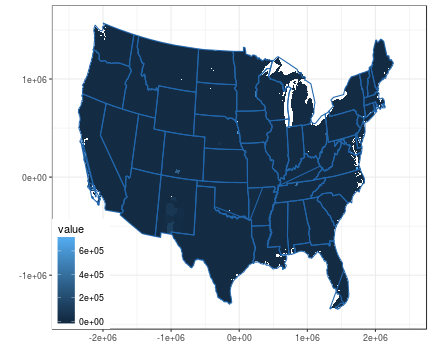

RCall.RObject{RCall.VecSxp}


In [51]:
mapdata(mean(f_wores,2))

# Mean annual failure - without reservoir

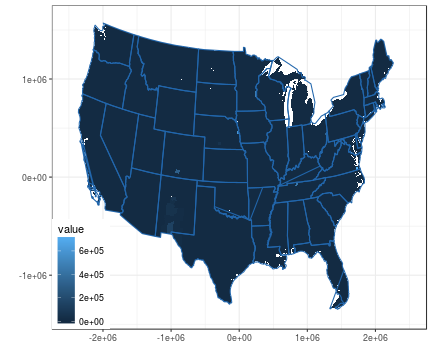

RCall.RObject{RCall.VecSxp}


In [52]:
mapdata(mean(f_wres,2))

# Mean annual failure - with reservoirs

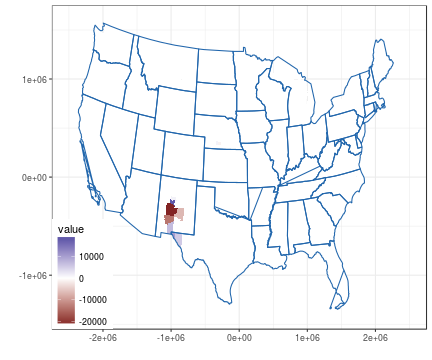

RCall.RObject{RCall.VecSxp}


In [53]:
mapdata(mean(f_wres-f_wores,2))

# Difference in mean annual failure - without reservoir

Standard deviation of water deficit at the county-level

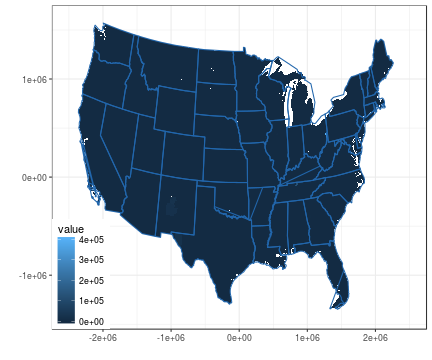

RCall.RObject{RCall.VecSxp}


In [54]:
mapdata(std(f_wores,2))

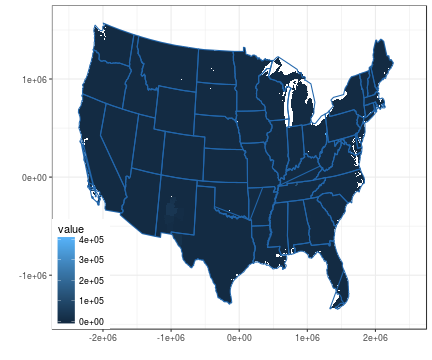

RCall.RObject{RCall.VecSxp}


In [55]:
mapdata(std(f_wres,2))

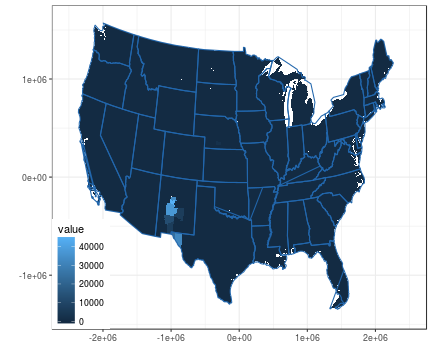

RCall.RObject{RCall.VecSxp}


In [57]:
mapdata(std(f_wres-f_wores,2))

Variations over time

In [74]:
using Plotly
my_plot = Plotly.plot([scatter(x=[1,2], y=[3,4])], Layout(title="My plot"))

LoadError: [91mUndefVarError: plot not defined[39m

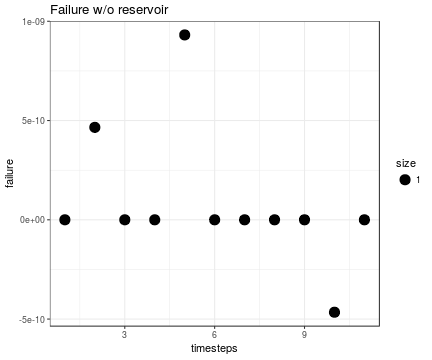

RCall.RObject{RCall.VecSxp}


In [62]:
xyplot(1:numsteps, vec(sum(f_wores,1)-sum(f_wres,1)), "Failure w/o reservoir", "timesteps", "failure")

## Looking at the reservoirs

In [68]:
Pkg.rm("RCall")
Pkg.rm("Nulls")
include("simulate.jl")

Loading from saved region network...
Loading from saved water network...
Loading from saved region network...


Loading from saved region network...


Loading from saved region network...
Creating model...


agriculture/edds/barley-gdd.csv
agriculture/edds/barley-kdd.csv
agriculture/edds/corn-gdd.csv
agriculture/edds/maize-gdd.csv
agriculture/edds/corn-kdd.csv
agriculture/edds/maize-kdd.csv
agriculture/edds/sorghum-gdd.csv
agriculture/edds/sorghum-kdd.csv
agriculture/edds/soybeans-gdd.csv
agriculture/edds/soybeans-kdd.csv
agriculture/edds/wheat-gdd.csv
agriculture/edds/wheat-kdd.csv
agriculture/edds/hay-gdd.csv
agriculture/edds/otherhay-gdd.csv
agriculture/edds/hay-kdd.csv
agriculture/edds/otherhay-kdd.csv


Stacktrace:
 [1] depwarn(::String, ::Symbol) at ./deprecated.jl:70
 [2] start at ./deprecated.jl:986 [inlined]
 [3] initagriculture(::Mimi.Model) at /home/laureline/AW-julia/awash/src/Agriculture.jl:68
 [4] include_from_node1(::String) at ./loading.jl:576
 [5] include(::String) at ./sysimg.jl:14
 [6] include_from_node1(::String) at ./loading.jl:576
 [7] include(::String) at ./sysimg.jl:14
 [8] include_from_node1(::String) at ./loading.jl:576
 [9] include(::String) at ./sysimg.jl:14
 [10] include_string(::String, ::String) at ./loading.jl:522
 [11] include_string(::Module, ::String, ::String) at /home/laureline/.julia/v0.6/Compat/src/Compat.jl:71
 [12] execute_request(::ZMQ.Socket, ::IJulia.Msg) at /home/laureline/.julia/v0.6/IJulia/src/execute_request.jl:158
 [13] (::Compat.#inner#17{Array{Any,1},IJulia.#execute_request,Tuple{ZMQ.Socket,IJulia.Msg}})() at /home/laureline/.julia/v0.6/Compat/src/Compat.jl:385
 [14] eventloop(::ZMQ.Socket) at /home/laureline/.julia/v0.6/IJulia/src/eventlo

LoadError: LoadError: LoadError: LoadError: [91mMethodError: any(::Base.##136#137{String}, ::Array{Any,1}) is ambiguous. Candidates:
  any(f, A::AbstractArray{#s3,N} where N where #s3>:Nulls.Null) in Nulls at /home/laureline/.julia/v0.6/Nulls/src/Nulls.jl:208
  any(f, A::AbstractArray{#s16,N} where N where #s16>:Missings.Missing) in Missings at /home/laureline/.julia/v0.6/Missings/src/Missings.jl:177
Possible fix, define
  any(::Any, ::AbstractArray{#s16,N} where N where #s16>:Union{Missings.Missing, Nulls.Null})[39m
while loading /home/laureline/AW-julia/awash/src/model-waterdemand.jl, in expression starting on line 33
while loading /home/laureline/AW-julia/awash/src/model.jl, in expression starting on line 1
while loading /home/laureline/AW-julia/awash/src/simulate.jl, in expression starting on line 10

In [67]:
model[:Reservoir, :storage]

 - Nulls                         0.1.2
